#LOAD DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
# Change directory to a folder in Google Drive
import os
os.chdir('/content/drive/MyDrive')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv')

df.head()

<ipython-input-3-c034696f6850>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv')


Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         NaN         NaN      NaN              NaN    NaN   
1         NaN         NaN         NaN      NaN              NaN    NaN   
2         NaN         NaN         NaN      NaN              NaN    NaN   
3         NaN         NaN         NaN      NaN              NaN    NaN   
4         NaN         NaN         NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 75 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

#DATASET CLEANING

## Handle Missing Value

In [5]:
print("Missing Values Before Handling:")
print(df.isnull().sum())

Missing Values Before Handling:
Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64


In [6]:
df_cleaned = df.dropna(axis=1, how='all')

In [7]:
print("Missing Values:")
print(df_cleaned.isnull().sum())

Missing Values:
Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340304
purpose                             0
title                              21
zip_code                            0
addr_state                          0
dti                               

In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [9]:
# Threshold for removing columns with too many missing values
threshold = 0.5  # 50%
missing_percentage = df_cleaned.isnull().mean()

# Drop columns with missing values > threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

print(f"\nDropped columns with more than {threshold*100}% missing values:")
print(columns_to_drop)

# Show remaining columns
print("\nRemaining columns:")
print(df_cleaned.info())


Dropped columns with more than 50.0% missing values:
Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog'],
      dtype='object')

Remaining columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null 

In [10]:
columns_to_drop = ['url', 'zip_code', 'desc', 'id', 'member_id', 'policy_code']
df_cleaned = df_cleaned.drop(columns=columns_to_drop, errors='ignore')
print(f"Dropped unnecessary columns: {columns_to_drop}")

Dropped unnecessary columns: ['url', 'zip_code', 'desc', 'id', 'member_id', 'policy_code']


In [11]:
print("Missing Values:")
print(df_cleaned.isnull().sum())

Missing Values:
Unnamed: 0                         0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      27588
emp_length                     21008
home_ownership                     0
annual_inc                         4
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
purpose                            0
title                             21
addr_state                         0
dti                                0
delinq_2yrs                       29
earliest_cr_line                  29
inq_last_6mths                    29
open_acc                          29
pub_rec                           29
revol_bal             

In [12]:
# Calculate the percentage of missing values
missing_percentage = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
print("Percentage of missing values:\n", missing_percentage)

Percentage of missing values:
 Unnamed: 0                     0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      5.916553
emp_length                     4.505399
home_ownership                 0.000000
annual_inc                     0.000858
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
purpose                        0.000000
title                          0.004504
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.006219
earliest_cr_line               0.006219
inq_last_6mths                 0.006219
open_acc 

In [13]:
# Drop columns with a high percentage of missing values
columns_to_drop = ['next_pymnt_d', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Impute missing values for numerical columns with the median
numerical_columns = ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'revol_util']
for col in numerical_columns:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Impute missing values for categorical columns with the mode
categorical_columns = ['emp_title', 'emp_length', 'title', 'last_pymnt_d', 'last_credit_pull_d']
for col in categorical_columns:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Verify there are no more missing values
print("Missing values after handling:\n", df_cleaned.isnull().sum())


<ipython-input-13-cf90a34d9ca8>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
<ipython-input-13-cf90a34d9ca8>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

Missing values after handling:
 Unnamed: 0                      0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
purpose                         0
title                           0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line               29
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                      0
total_acc       

In [14]:
# Specify the columns with missing values to drop rows for
columns_to_check = ['earliest_cr_line', 'collections_12_mths_ex_med', 'acc_now_delinq']

# Drop rows with missing values in the specified columns
df_cleaned = df_cleaned.dropna(subset=columns_to_check)

# Check the remaining missing values to confirm the operation
print("Missing values after dropping rows:")
print(df_cleaned.isnull().sum())


Missing values after dropping rows:
Unnamed: 0                    0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_

## Handle Duplicated Data

In [15]:
print("\nNumber of Duplicate Rows Before Handling:", df_cleaned.duplicated().sum())


Number of Duplicate Rows Before Handling: 0


## Feature Encoding 1

In [16]:
# Select only object (categorical) columns
object_columns = df_cleaned.select_dtypes(include=['object']).columns

# Print unique values for each object column
for column in object_columns:
    print(f"Unique values in '{column}':")
    print(df_cleaned[column].unique())
    print("\n")


Unique values in 'term':
[' 36 months' ' 60 months']


Unique values in 'grade':
['B' 'C' 'A' 'E' 'F' 'D' 'G']


Unique values in 'sub_grade':
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']


Unique values in 'emp_title':
['Teacher' 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']


Unique values in 'emp_length':
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']


Unique values in 'home_ownership':
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']


Unique values in 'verification_status':
['Verified' 'Source Verified' 'Not Verified']


Unique values in 'issue_d':
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 

In [17]:
# Define a dictionary to map each unique loan status to a numeric value
loan_status_mapping = {
    'Fully Paid': 0,
    'Charged Off': 1,
    'Current': 2,
    'Default': 3,
    'Late (31-120 days)': 6,
    'In Grace Period': 4,
    'Late (16-30 days)': 5,
    'Does not meet the credit policy. Status:Fully Paid': 7,
    'Does not meet the credit policy. Status:Charged Off': 8
}

# Map the loan_status column to numeric values using the mapping
df_cleaned['loan_status_encoded'] = df_cleaned['loan_status'].map(loan_status_mapping)

# Check the results
print(df_cleaned[['loan_status', 'loan_status_encoded']].head())


   loan_status  loan_status_encoded
0   Fully Paid                    0
1  Charged Off                    1
2   Fully Paid                    0
3   Fully Paid                    0
4      Current                    2


#EDA

## Descriptive Statistics

In [18]:
df_cleaned.describe()

Unnamed: 0      loan_amnt    funded_amnt  funded_amnt_inv  \
count  466140.000000  466140.000000  466140.000000    466140.000000   
mean   233201.633816   14319.863614   14294.471243     14226.388889   
std    134583.481833    8286.085374    8273.956540      8295.711611   
min         0.000000     500.000000     500.000000         0.000000   
25%    116679.750000    8000.000000    8000.000000      8000.000000   
50%    233214.500000   12000.000000   12000.000000     12000.000000   
75%    349749.250000   20000.000000   20000.000000     19950.000000   
max    466284.000000   35000.000000   35000.000000     35000.000000   

            int_rate    installment    annual_inc            dti  \
count  466140.000000  466140.000000  4.661400e+05  466140.000000   
mean       13.830086     432.136814  7.327738e+04      17.221278   
std         4.357705     243.473002  5.495802e+04       7.850364   
min         5.420000      15.670000  1.896000e+03       0.000000   
25%        10.990000     256.820000  4.500000e+04      11.370000   
50%        13.660000     380.040000  6.300000e+04      16.870000   
75%        16.490000     566.660000  8.895049e+04      22.780000   
max        26.060000    1409.990000  7.500000e+06      39.990000   

         delinq_2yrs  inq_last_6mths  ...  total_pymnt_inv  total_rec_prncp  \
count  466140.000000   466140.000000  ...    466140.000000    466140.000000   
mean        0.284657        0.804396  ...     11473.071437      8867.258234   
std         0.797174        1.090065  ...      8253.443538      7032.148339   
min         0.000000        0.000000  ...         0.000000         0.000000   
25%         0.000000        0.000000  ...      5501.160000      3709.125000   
50%         0.000000        0.000000  ...      9357.950000      6819.925000   
75%         0.000000        1.000000  ...     15234.295000     12000.000000   
max        29.000000       33.000000  ...     57777.580000     35000.030000   

       total_rec_int  total_rec_late_fee     recoveries  \
count  466140.000000       466140.000000  466140.000000   
mean     2589.199500            0.648850      85.350950   
std      2483.973276            5.259018     552.252506   
min         0.000000            0.000000       0.000000   
25%       957.740000            0.000000       0.000000   
50%      1819.135000            0.000000       0.000000   
75%      3305.062500            0.000000       0.000000   
max     24205.620000          358.680000   33520.270000   

       collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
count            466140.000000    466140.000000               466140.000000   
mean                  8.959579      3124.696446                    0.009085   
std                  85.466870      5555.351074                    0.108648   
min                   0.000000         0.000000                    0.000000   
25%                   0.000000       312.750000                    0.000000   
50%                   0.000000       545.990000                    0.000000   
75%                   0.000000      3190.120000                    0.000000   
max                7002.190000     36234.440000                   20.000000   

       acc_now_delinq  loan_status_encoded  
count   466140.000000        466140.000000  
mean         0.003999             1.228923  
std          0.068614             1.237184  
min          0.000000             0.000000  
25%          0.000000             0.000000  
50%          0.000000             2.000000  
75%          0.000000             2.000000  
max          5.000000             8.000000  

[8 rows x 28 columns]

In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466140 entries, 0 to 466284
Data columns (total 46 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466140 non-null  int64  
 1   loan_amnt                   466140 non-null  int64  
 2   funded_amnt                 466140 non-null  int64  
 3   funded_amnt_inv             466140 non-null  float64
 4   term                        466140 non-null  object 
 5   int_rate                    466140 non-null  float64
 6   installment                 466140 non-null  float64
 7   grade                       466140 non-null  object 
 8   sub_grade                   466140 non-null  object 
 9   emp_title                   466140 non-null  object 
 10  emp_length                  466140 non-null  object 
 11  home_ownership              466140 non-null  object 
 12  annual_inc                  466140 non-null  float64
 13  verification_status

## Univariate Analysis

<ipython-input-20-f6138f1127b6>:21: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlap


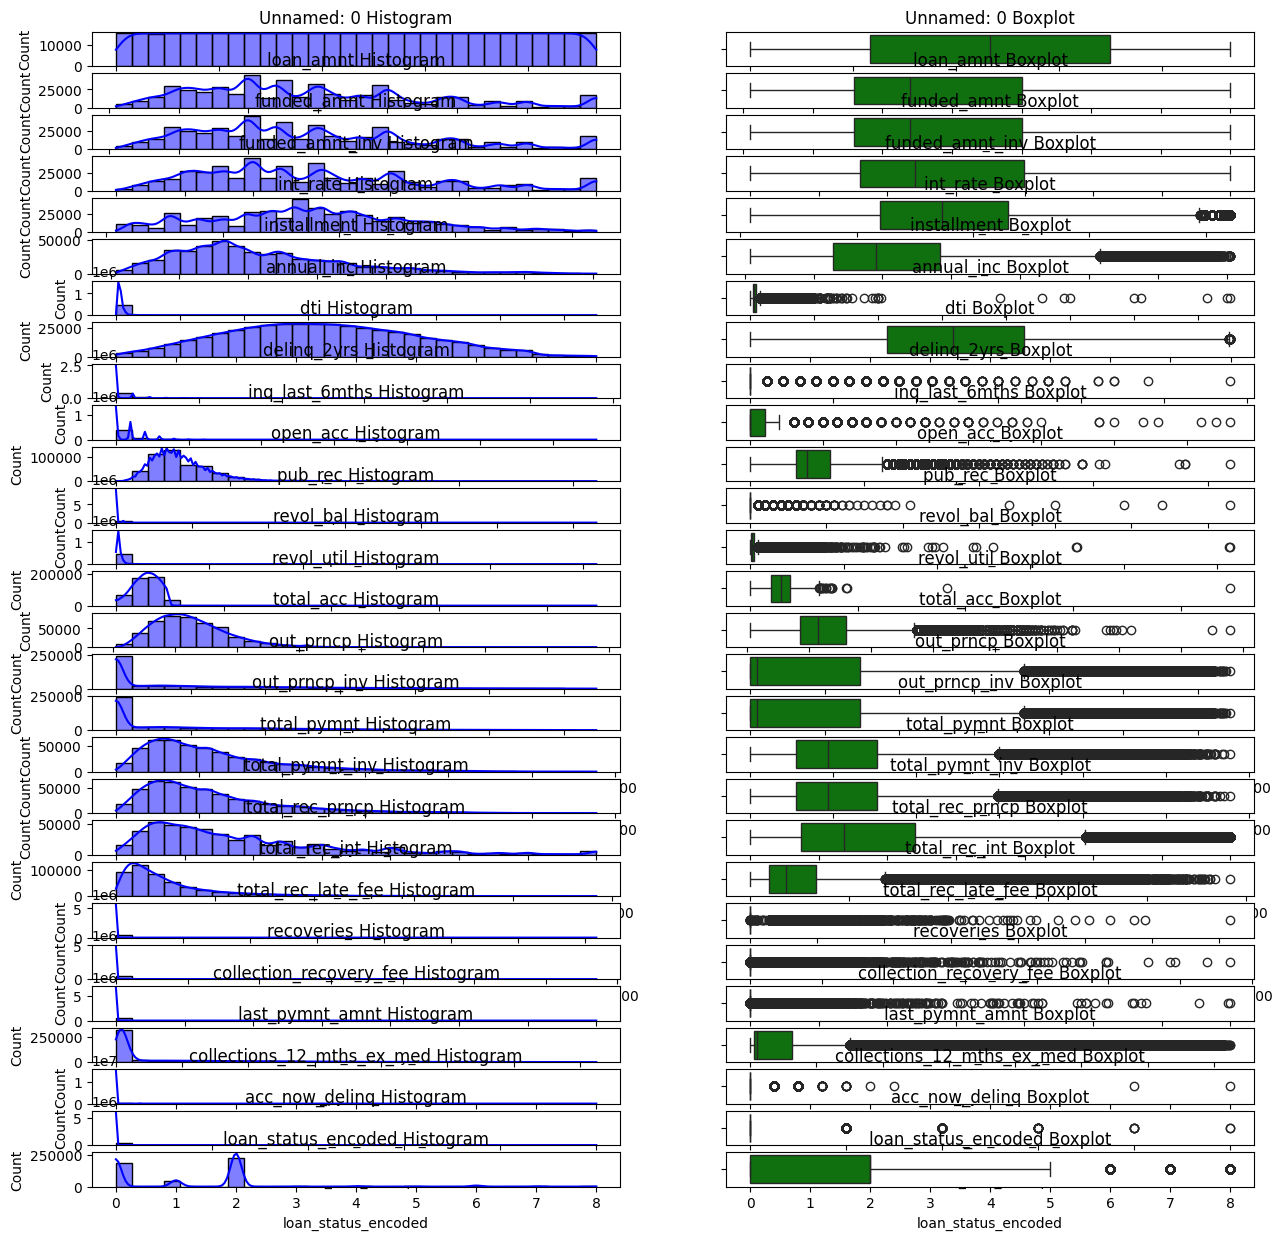

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Set the figure size
plt.figure(figsize=(15, 15))

# Loop through each numeric column and plot the histogram and boxplot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 2, 2*i-1)  # Create a subplot for histogram
    sns.histplot(df_cleaned[column], kde=True, color='blue', bins=30)
    plt.title(f'{column} Histogram')

    plt.subplot(len(numeric_columns), 2, 2*i)  # Create a subplot for boxplot
    sns.boxplot(x=df_cleaned[column], color='green')
    plt.title(f'{column} Boxplot')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## Multivariate Analysis

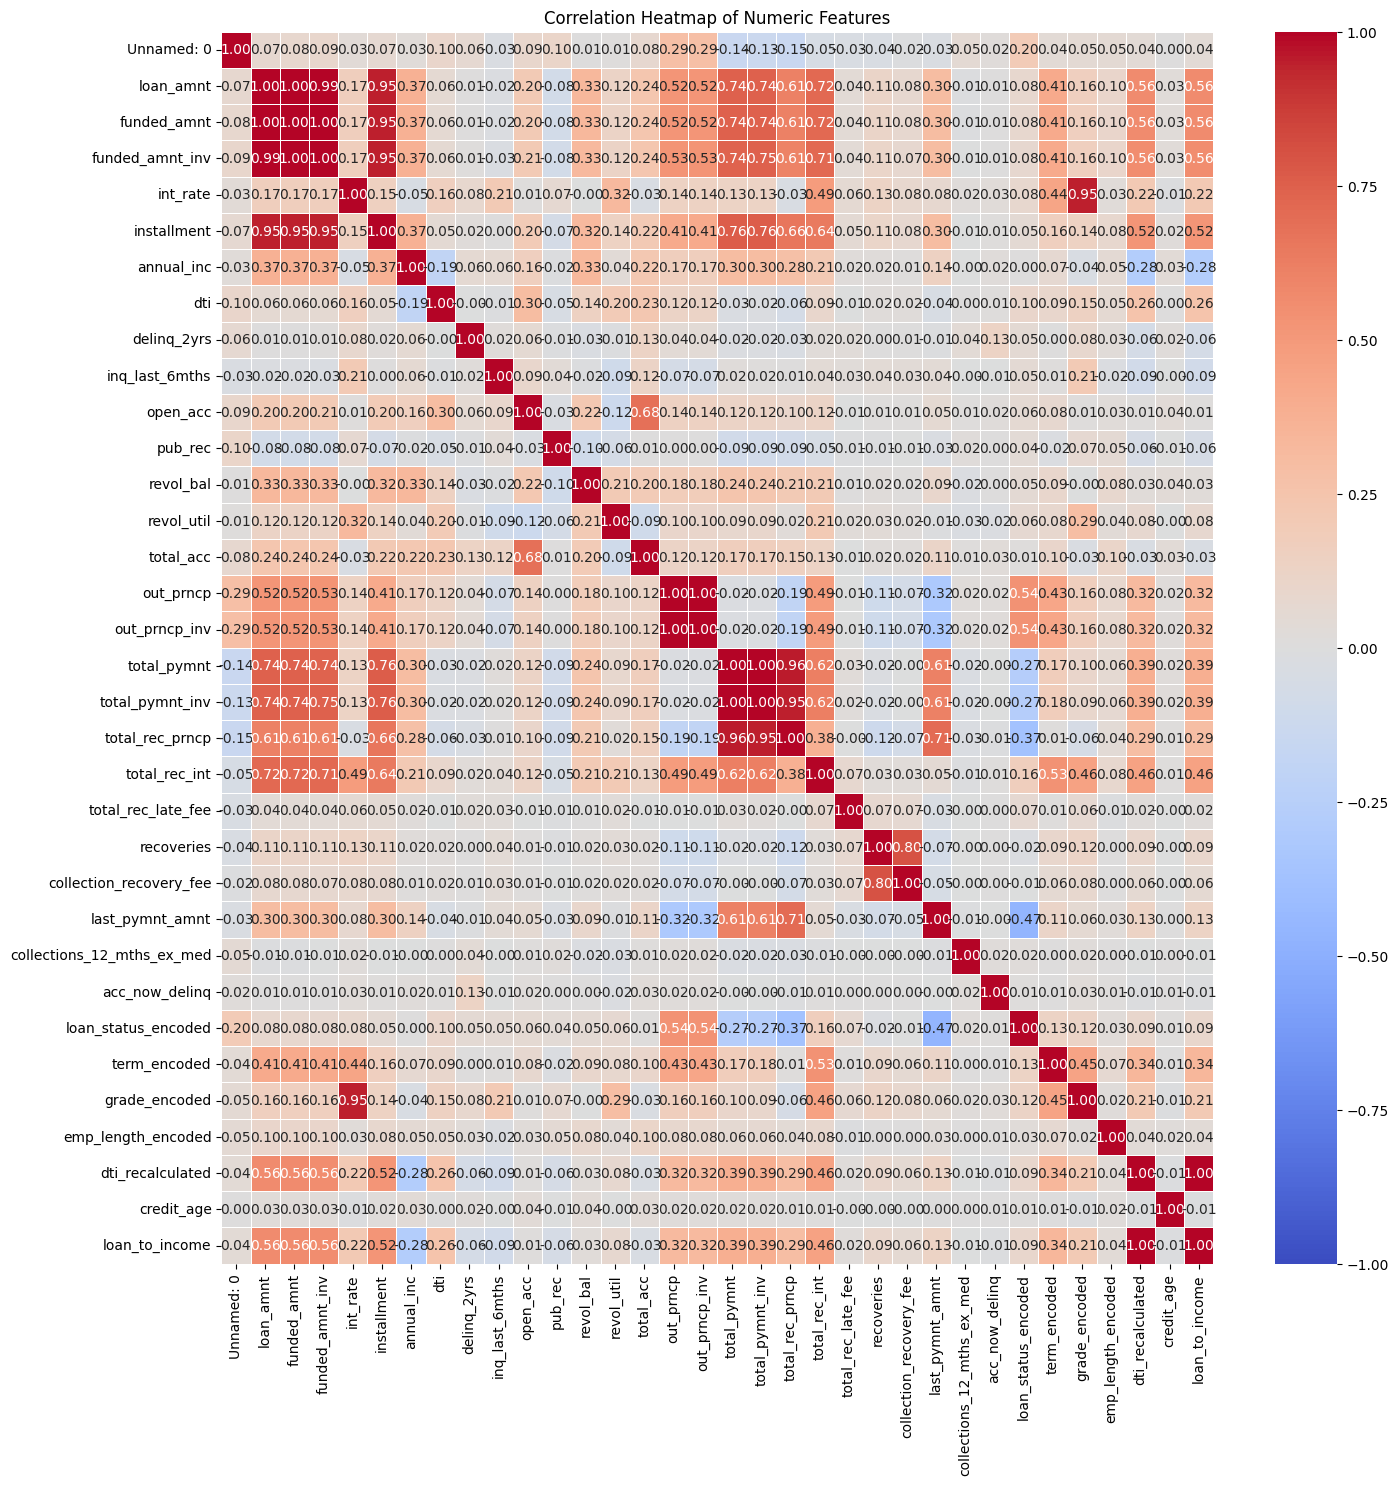

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix =  df_cleaned[numeric_columns].corr()

# Set the figure size
plt.figure(figsize=(16,16))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Set the title
plt.title('Correlation Heatmap of Numeric Features')

# Show the plot
plt.show()


## Bivariate Analysis (Features x Target)

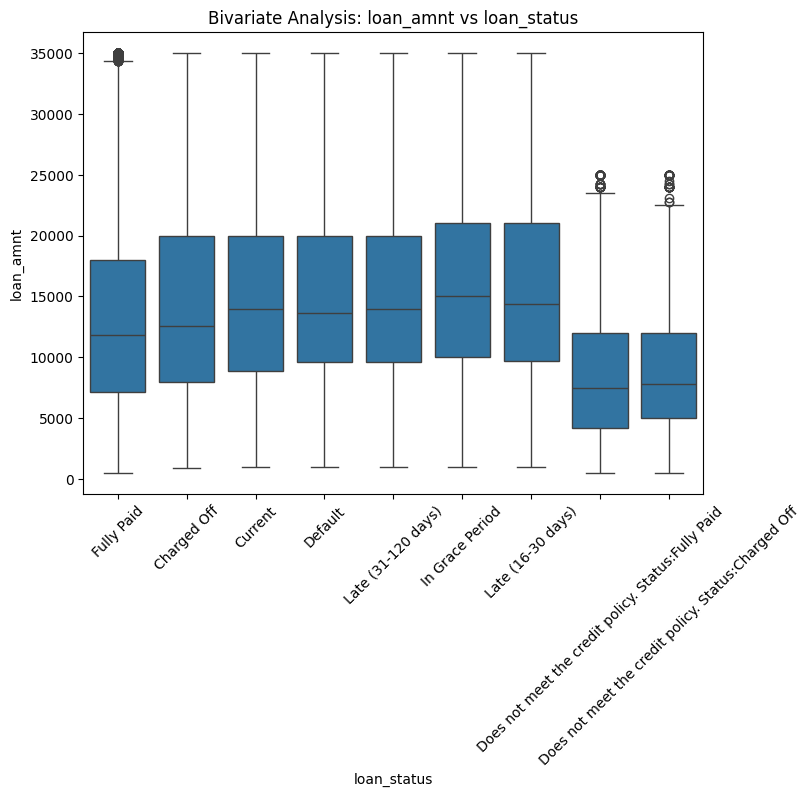

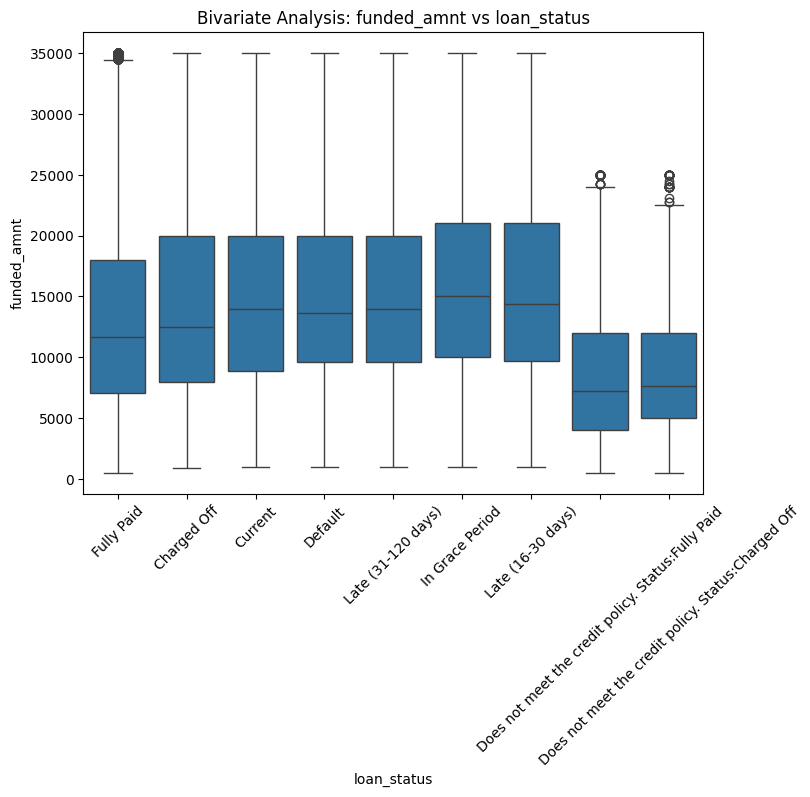

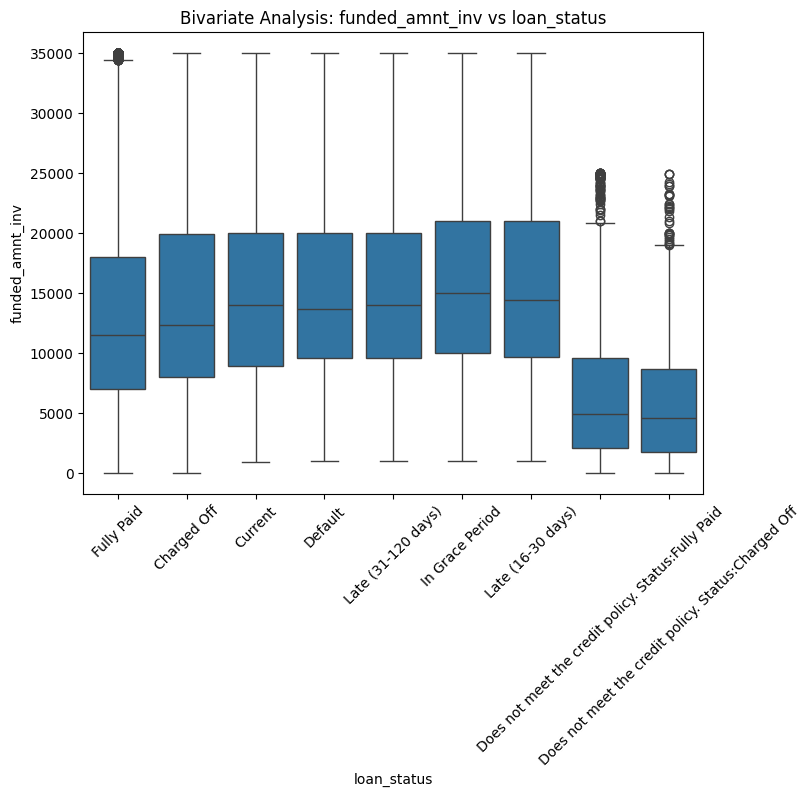

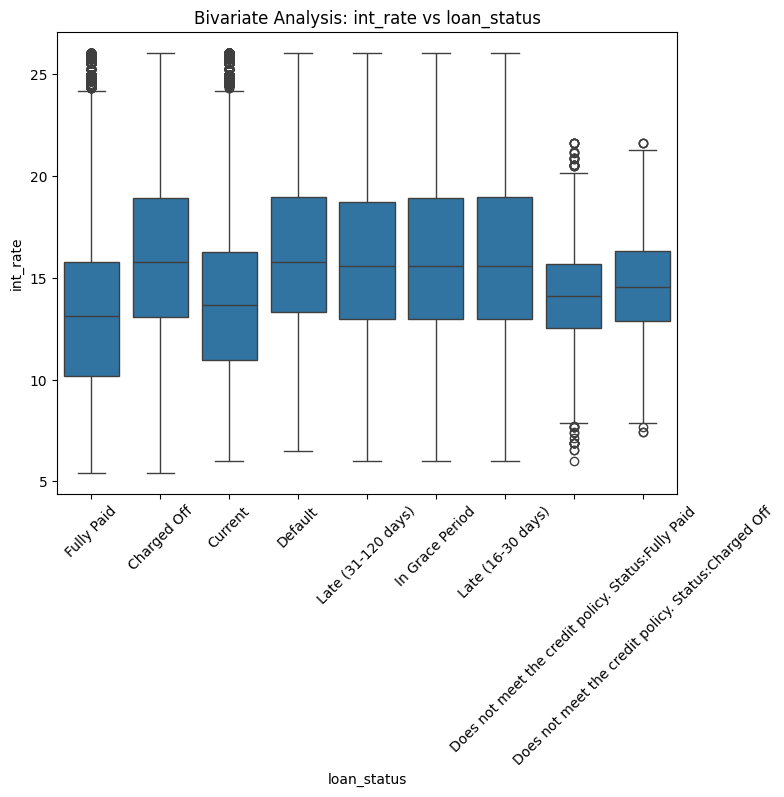

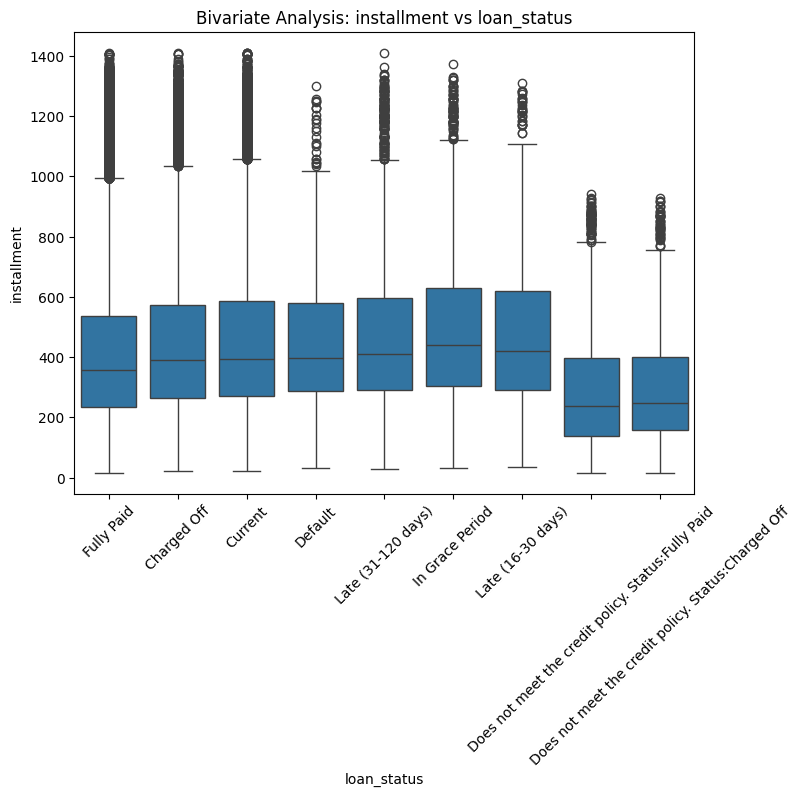

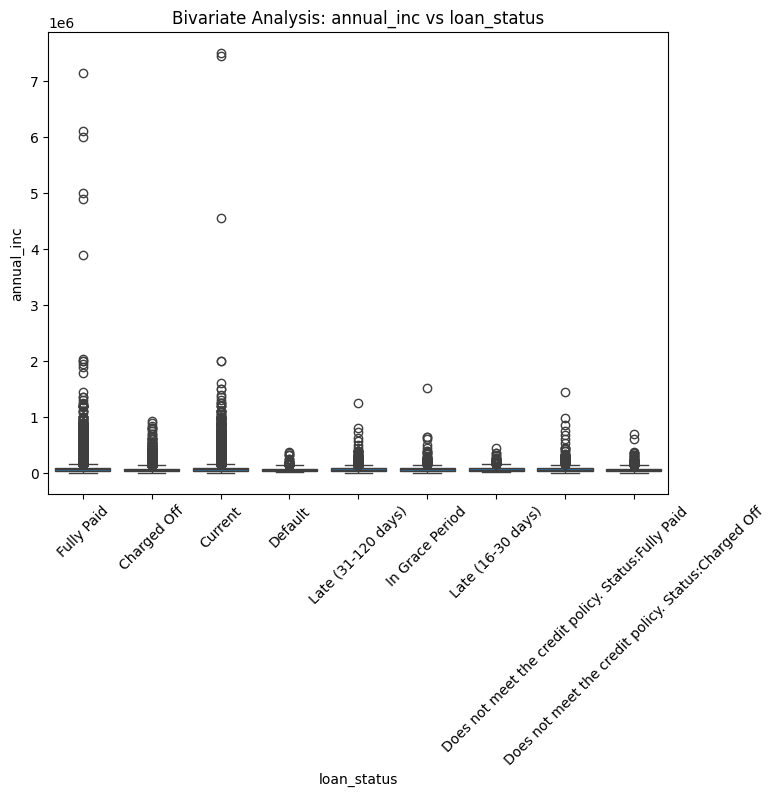

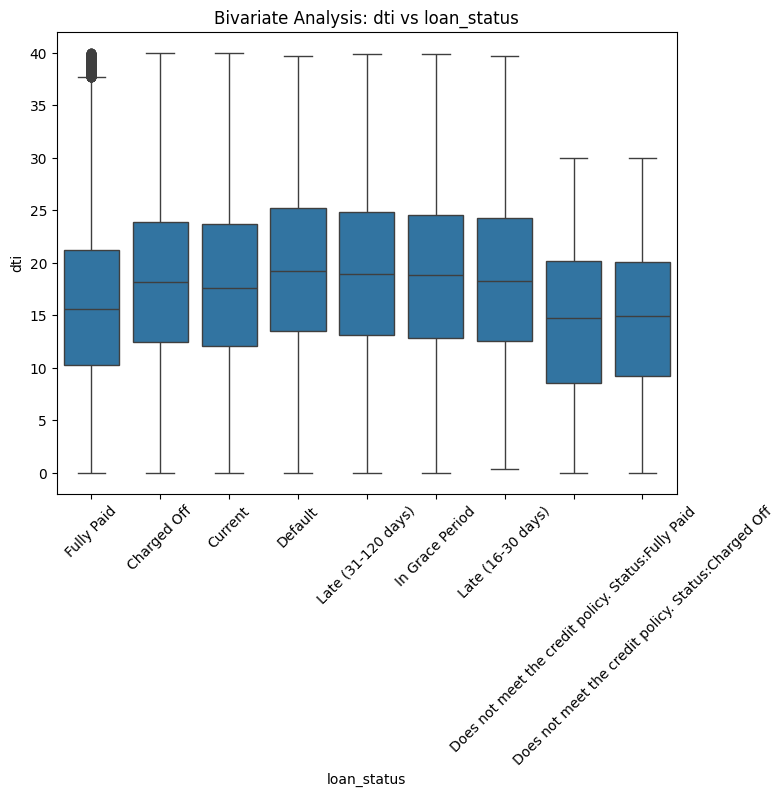

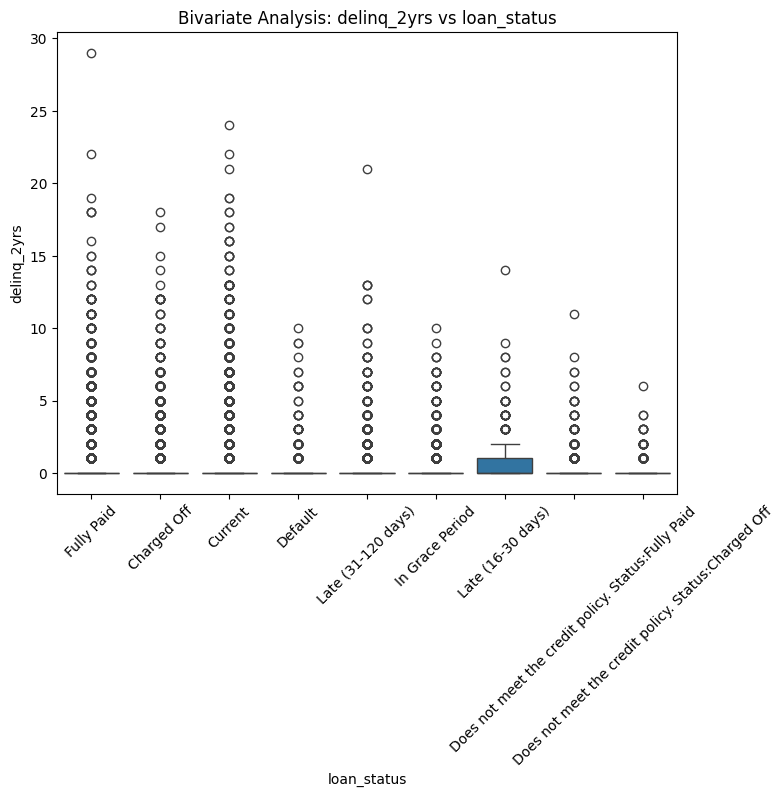

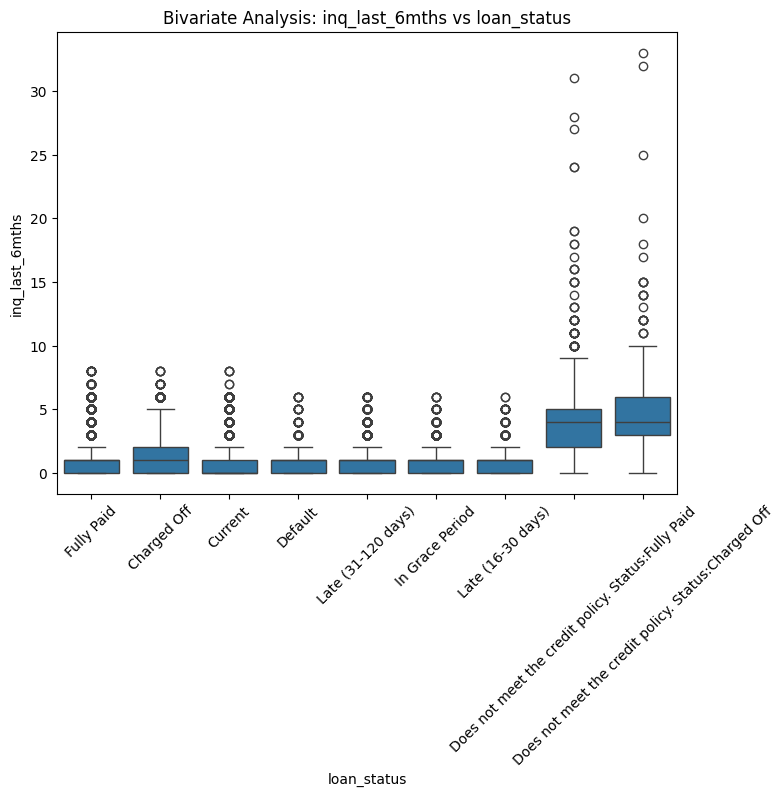

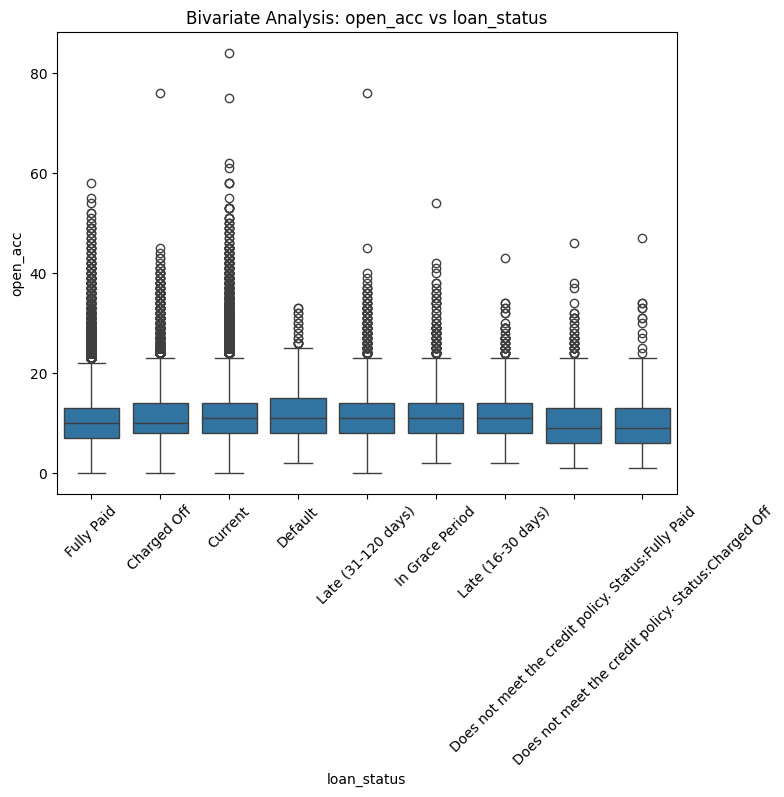

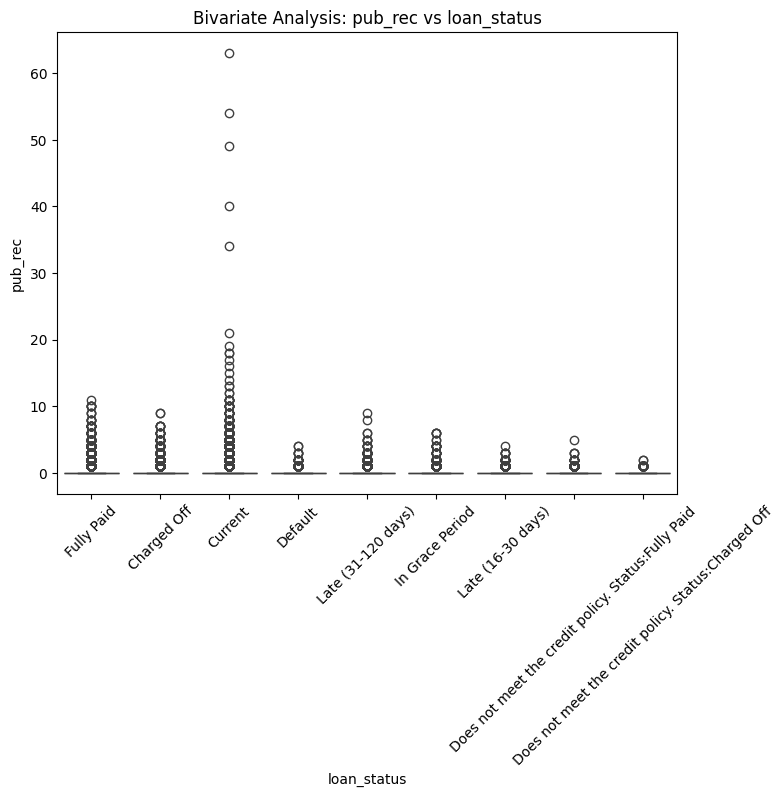

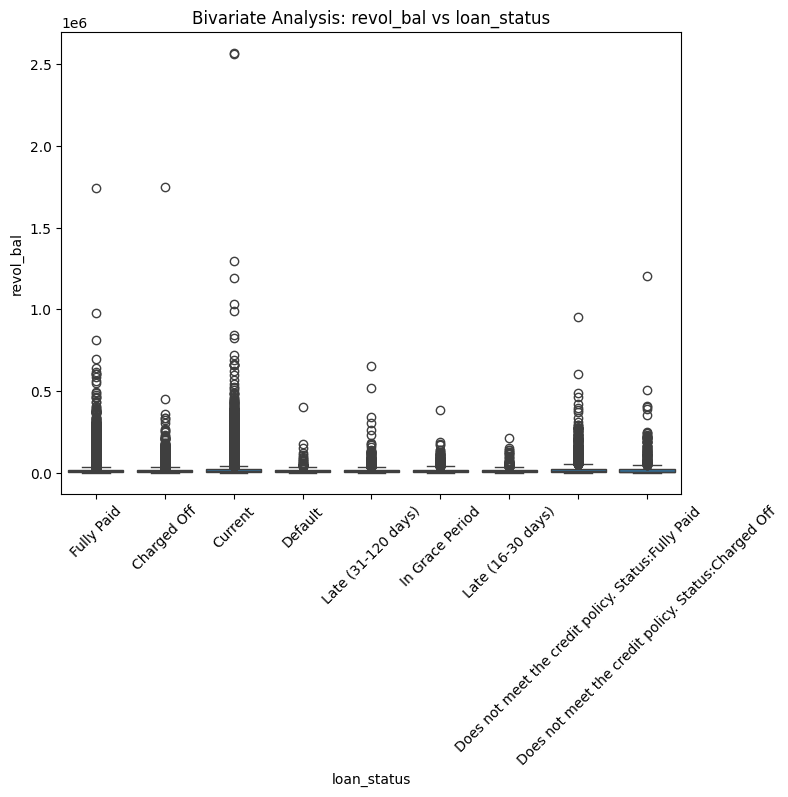

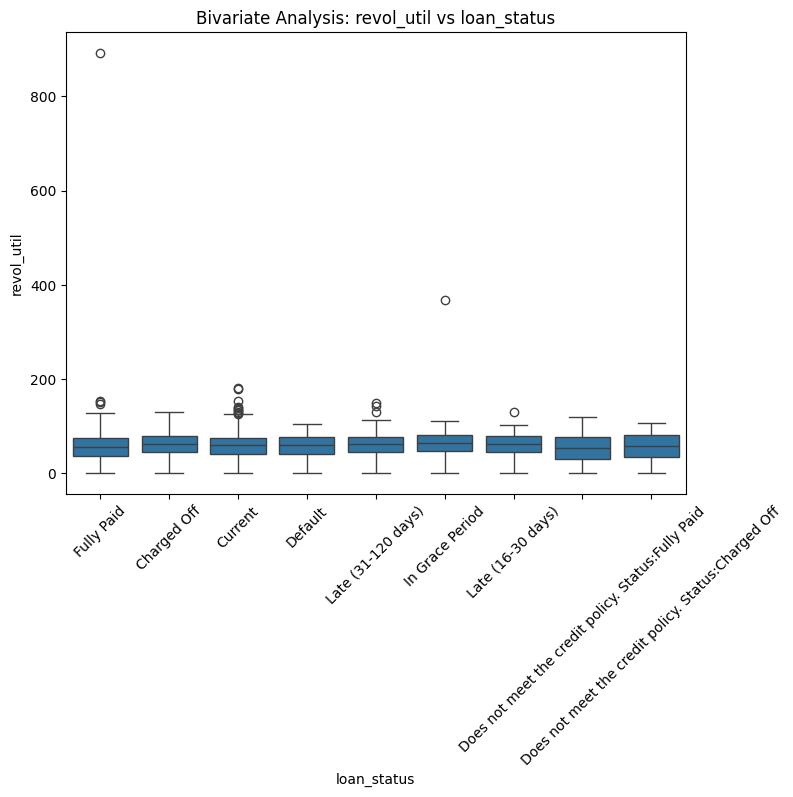

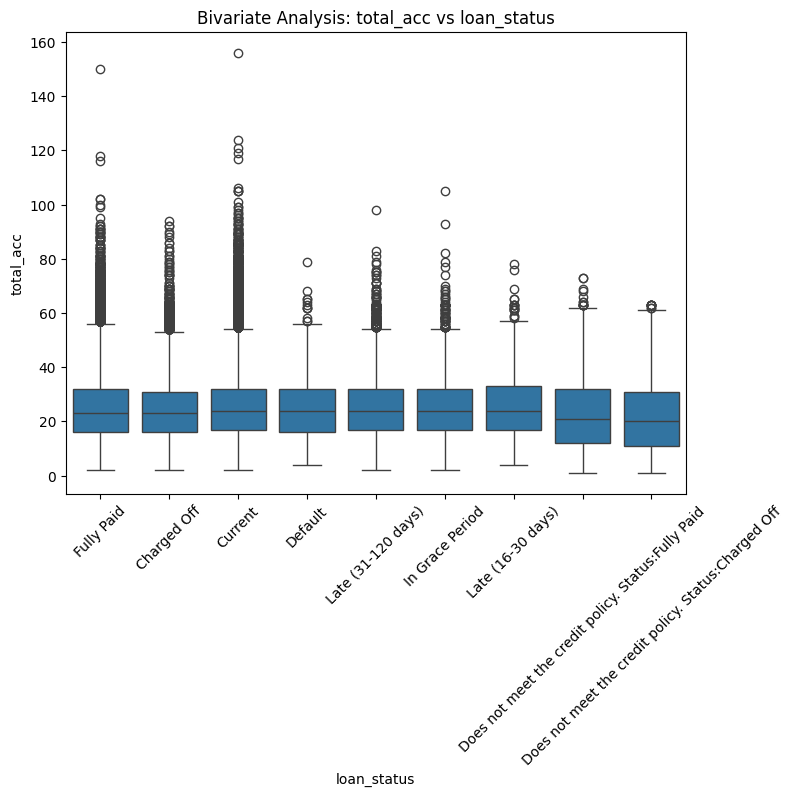

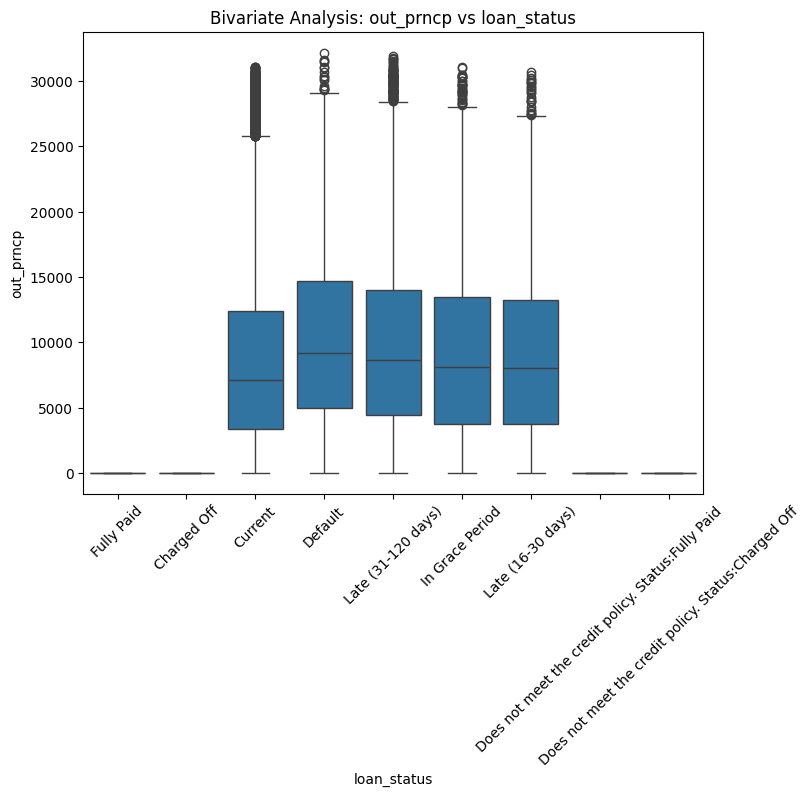

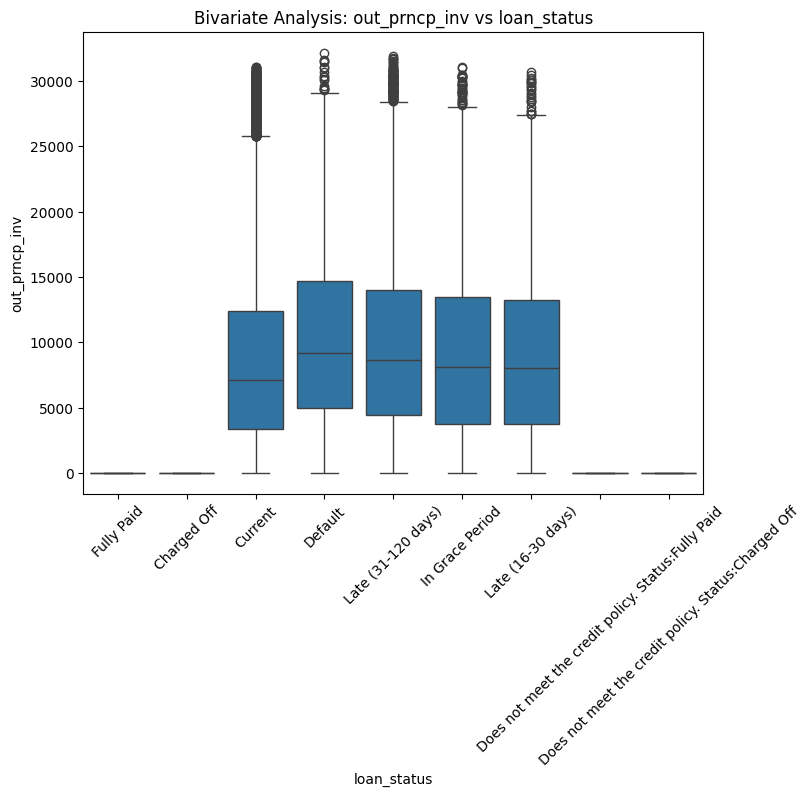

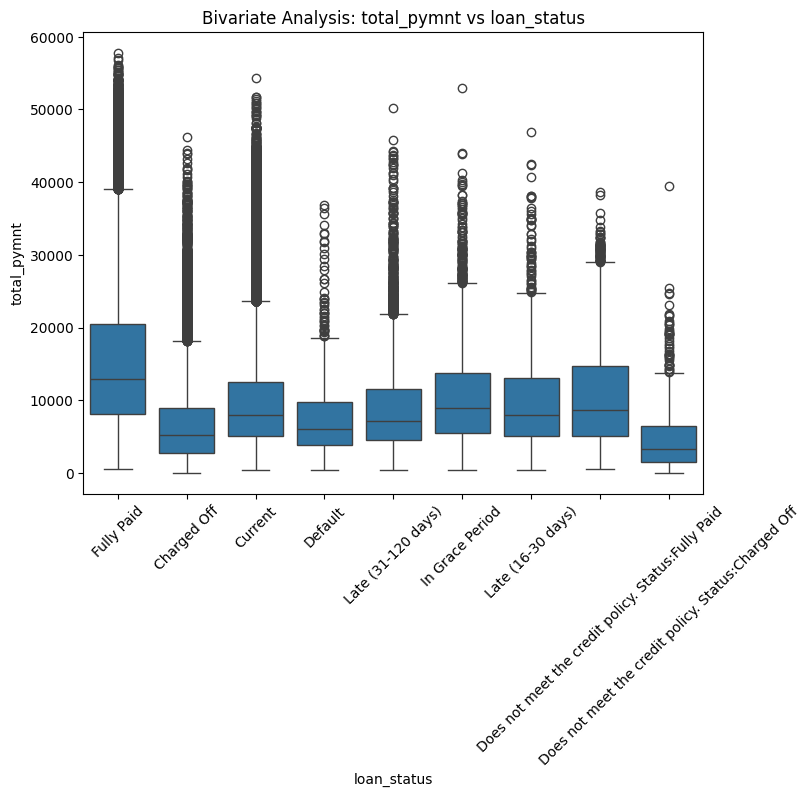

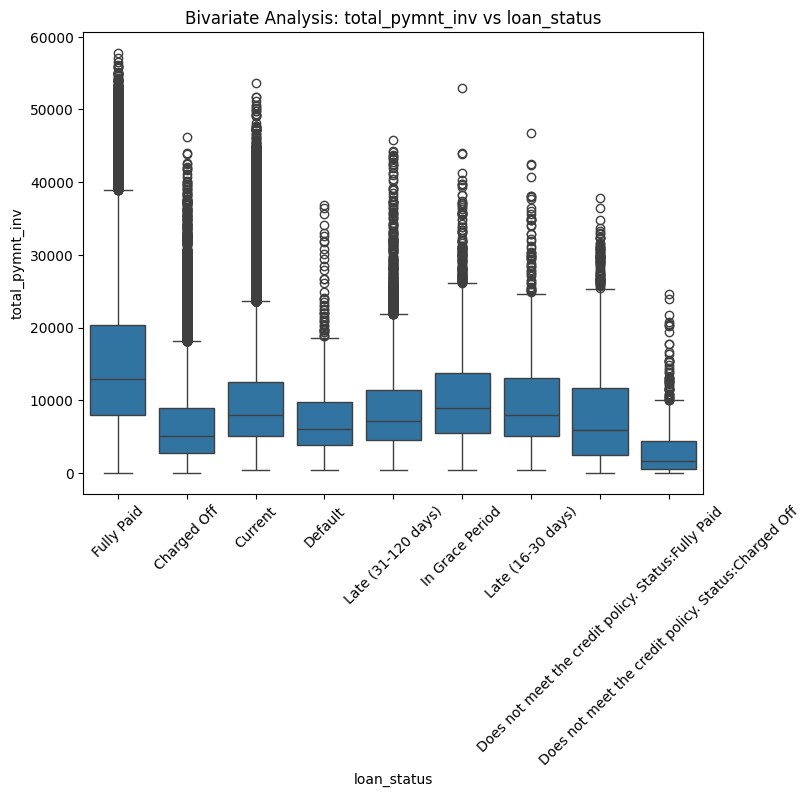

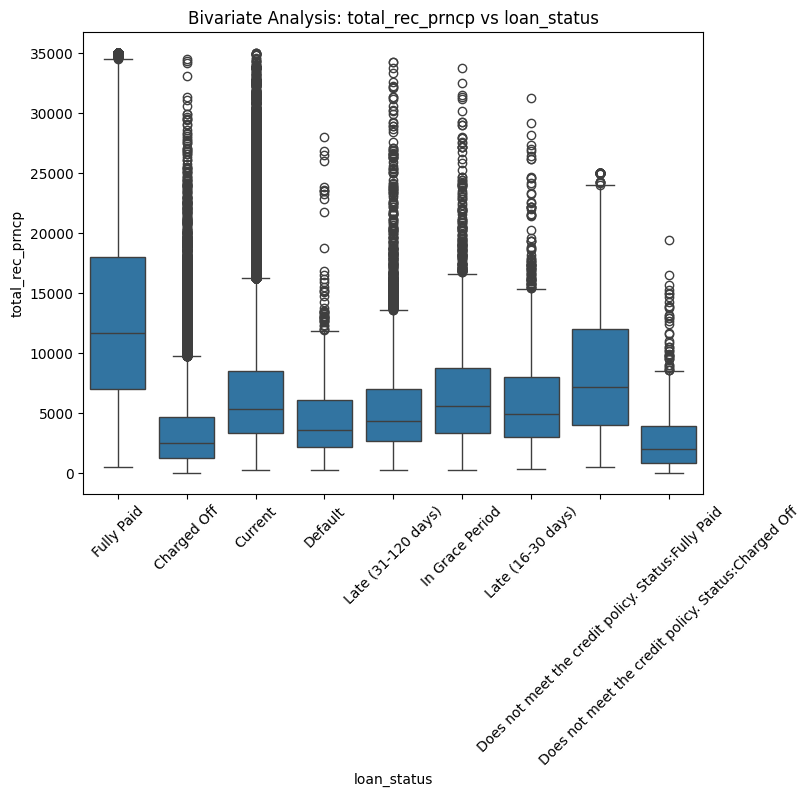

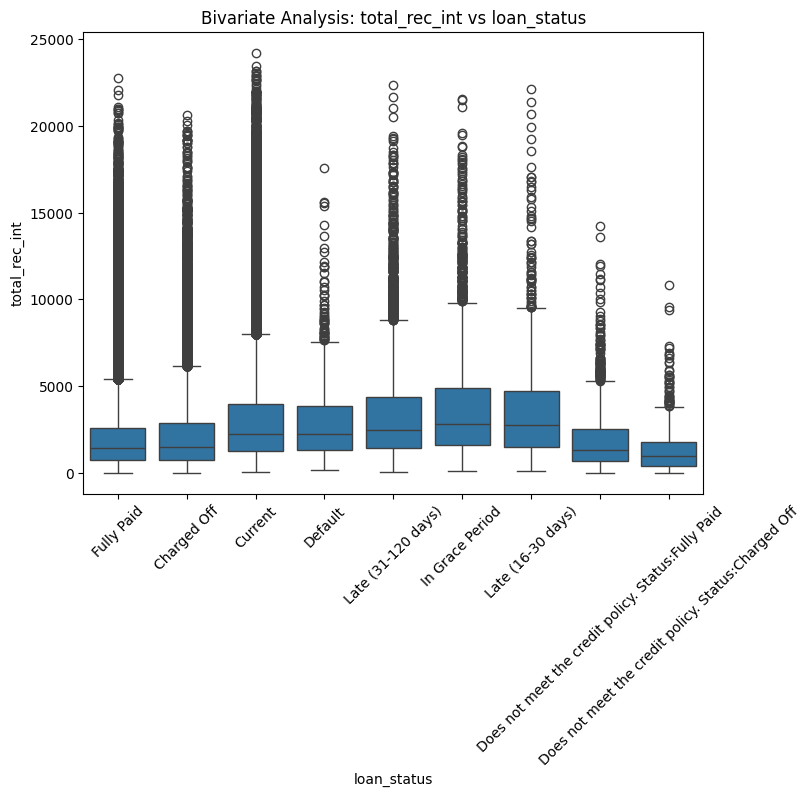

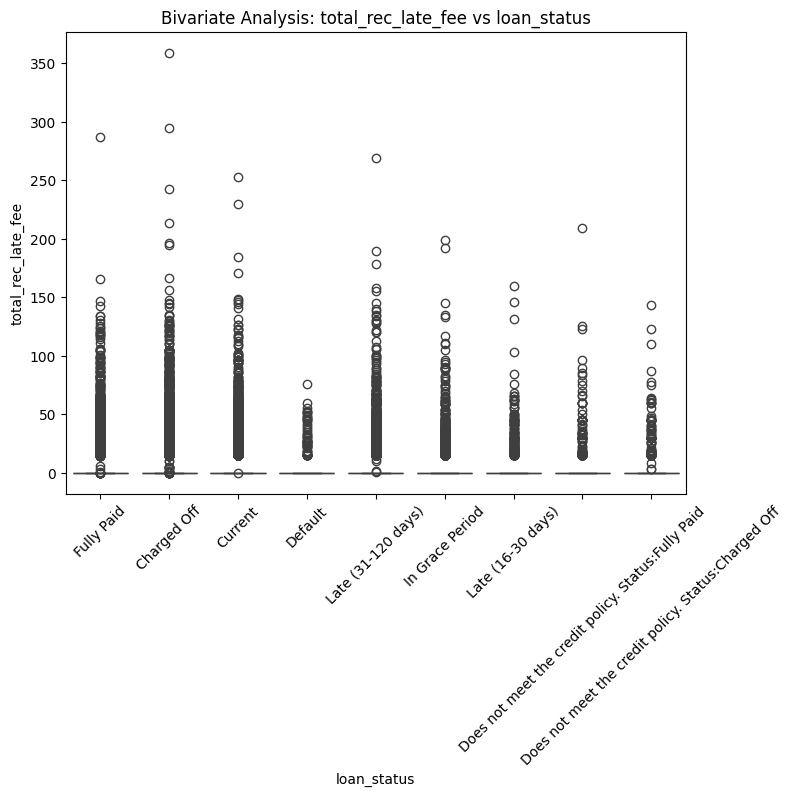

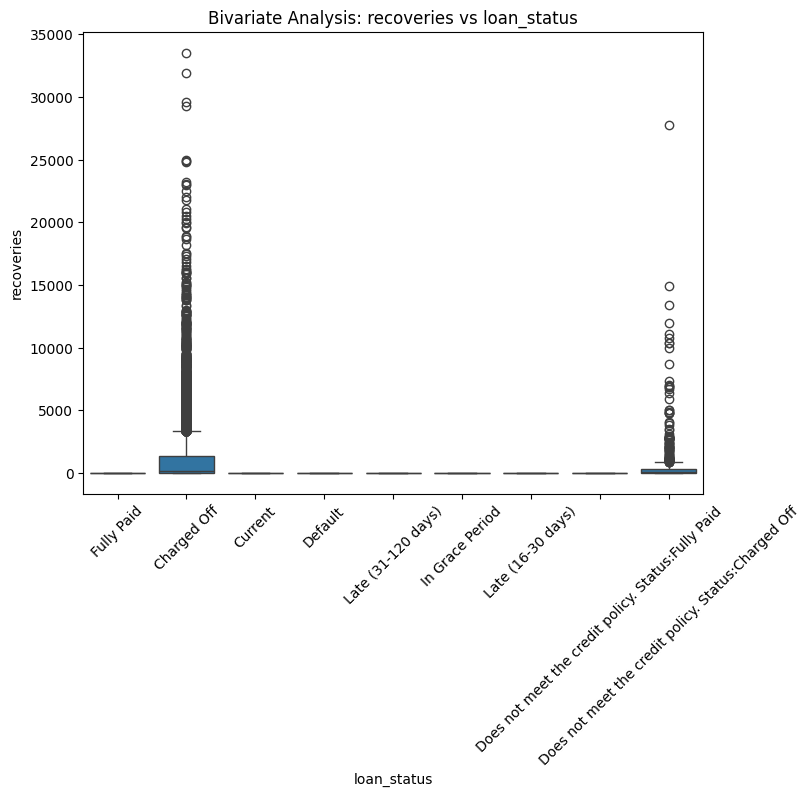

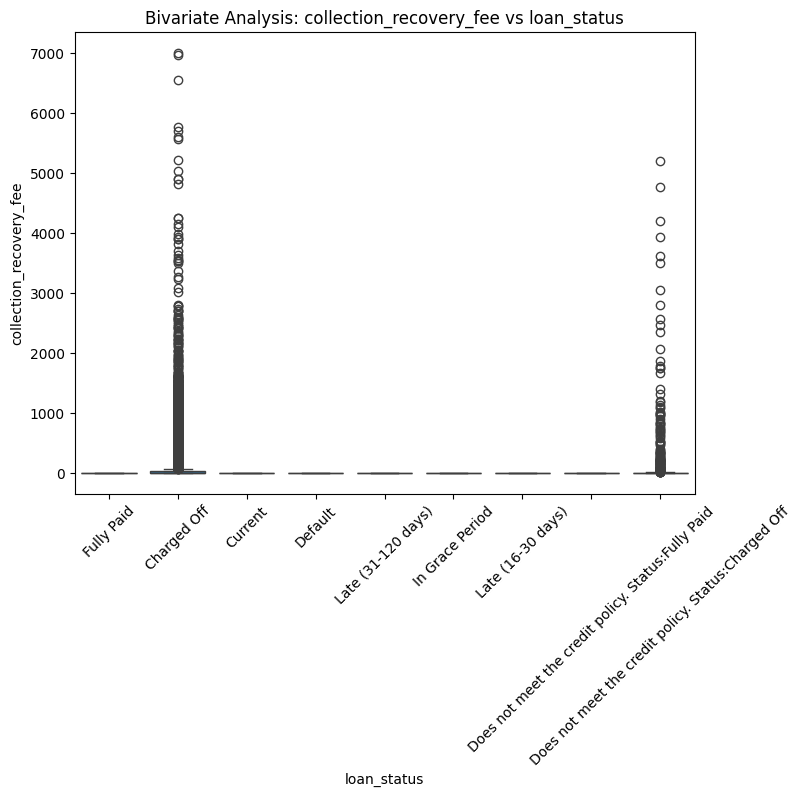

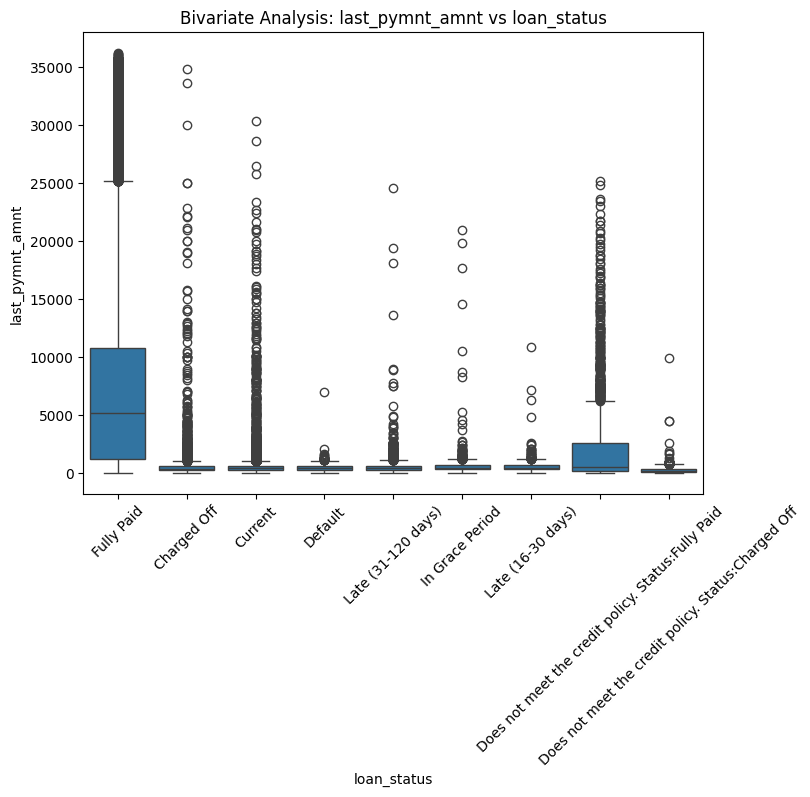

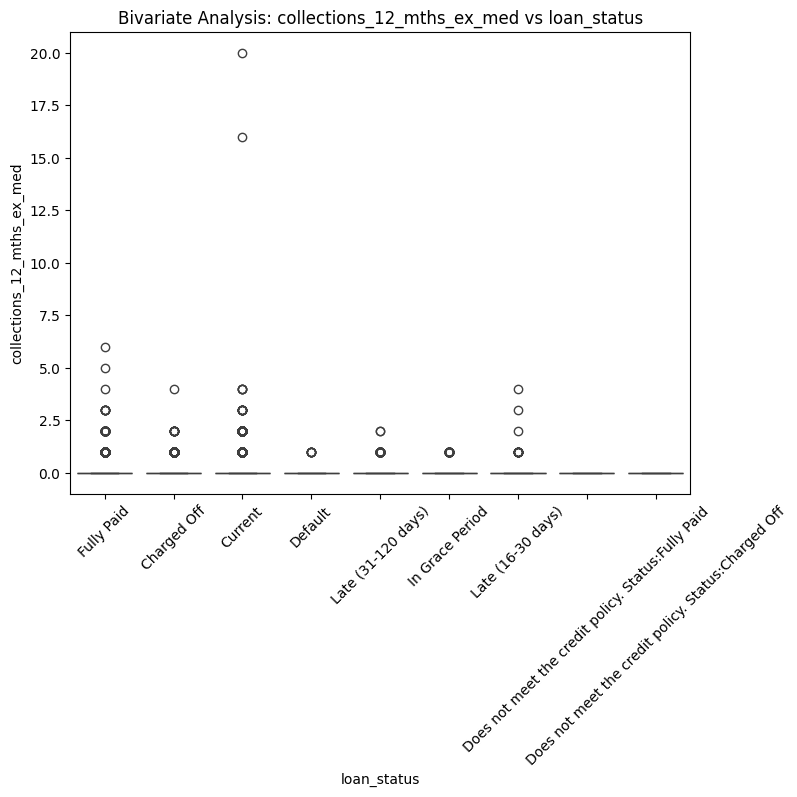

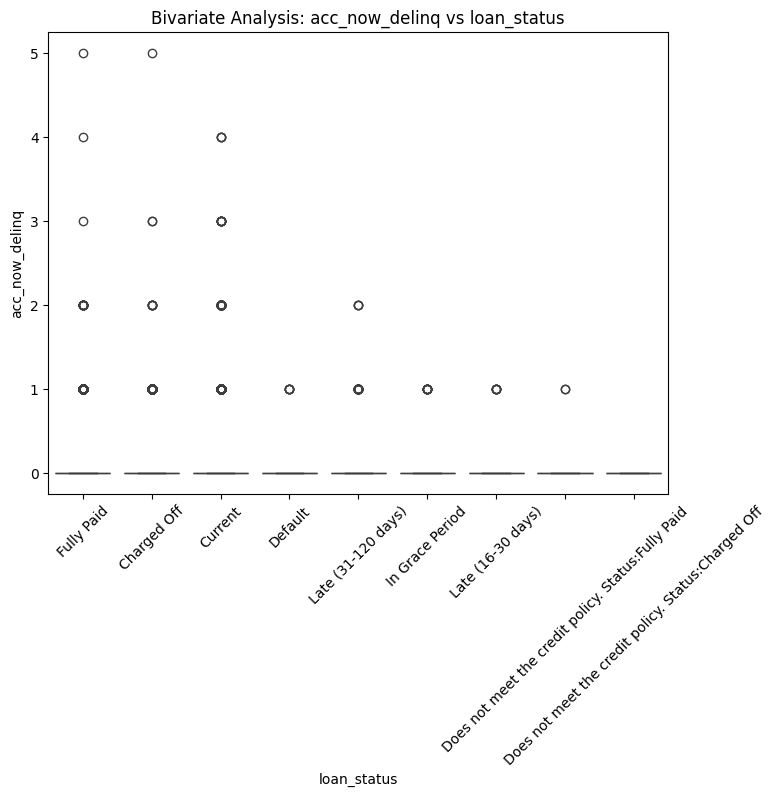

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns in the dataset
numeric_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment',
                   'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
                   'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
                   'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                   'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                   'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq']

# Bivariate analysis for numeric columns using boxplot
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_cleaned, x='loan_status', y=col)
    plt.title(f'Bivariate Analysis: {col} vs loan_status')
    plt.xticks(rotation=45)
    plt.show()


<Figure size 800x600 with 0 Axes>

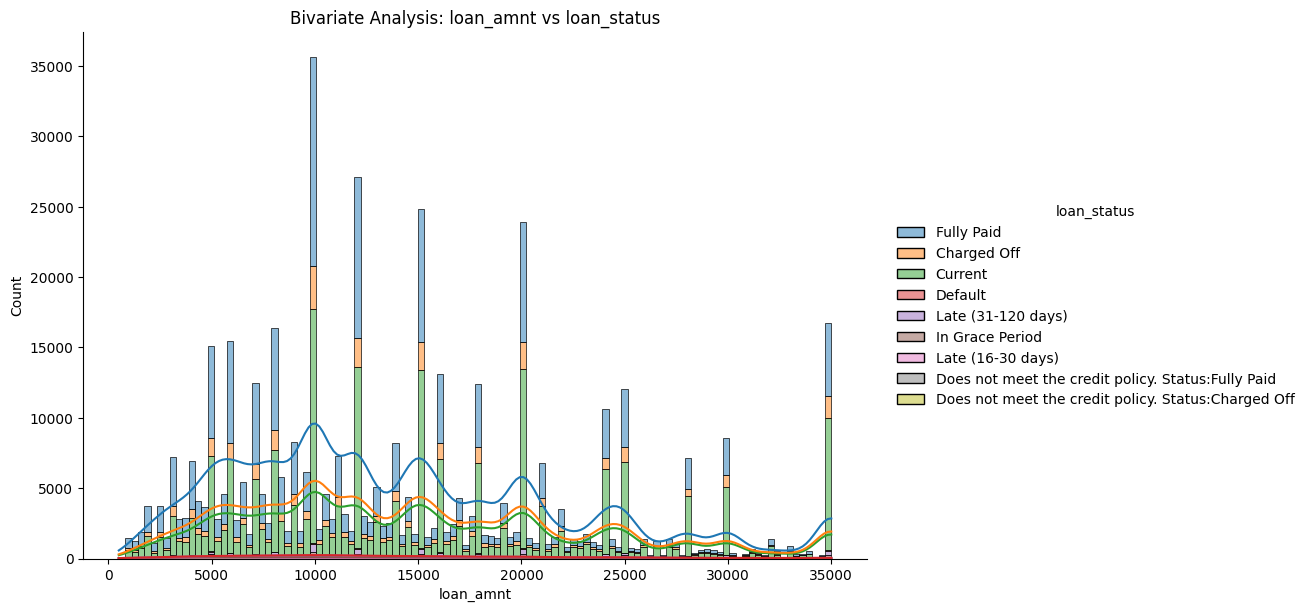

<Figure size 800x600 with 0 Axes>

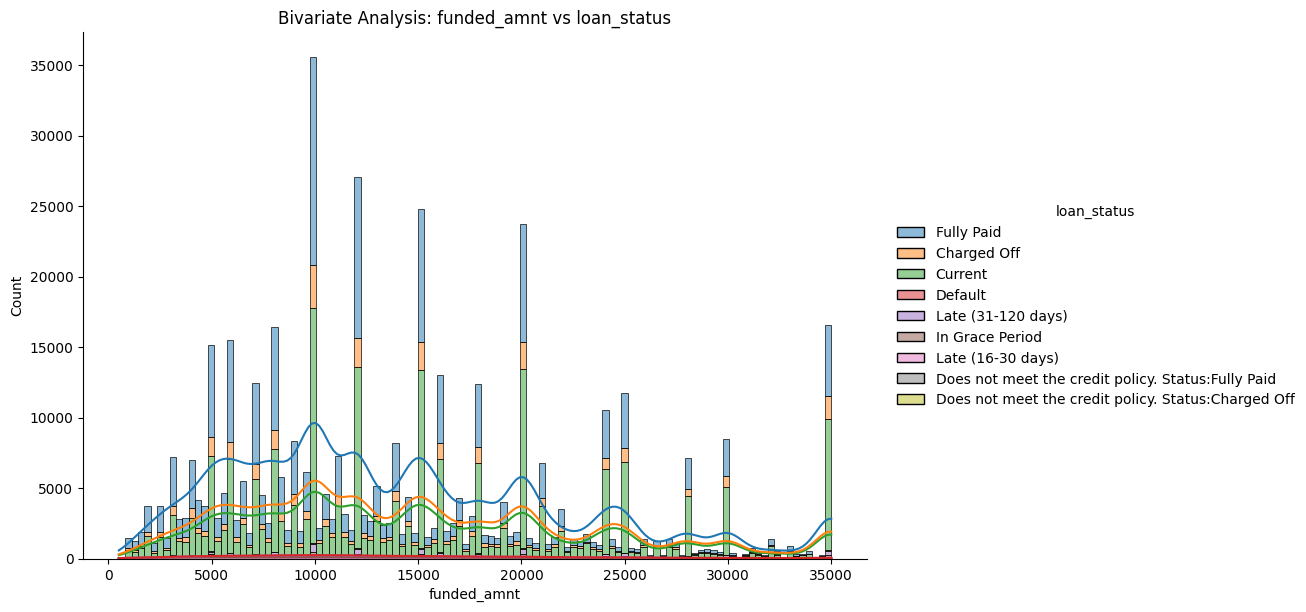

<Figure size 800x600 with 0 Axes>

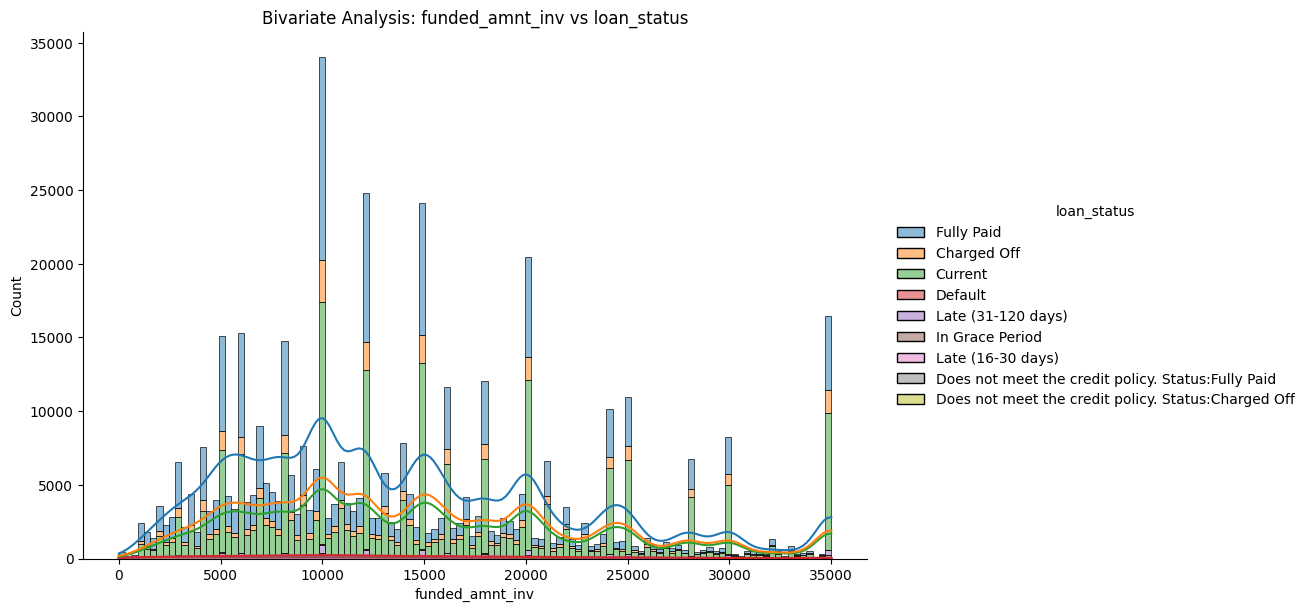

<Figure size 800x600 with 0 Axes>

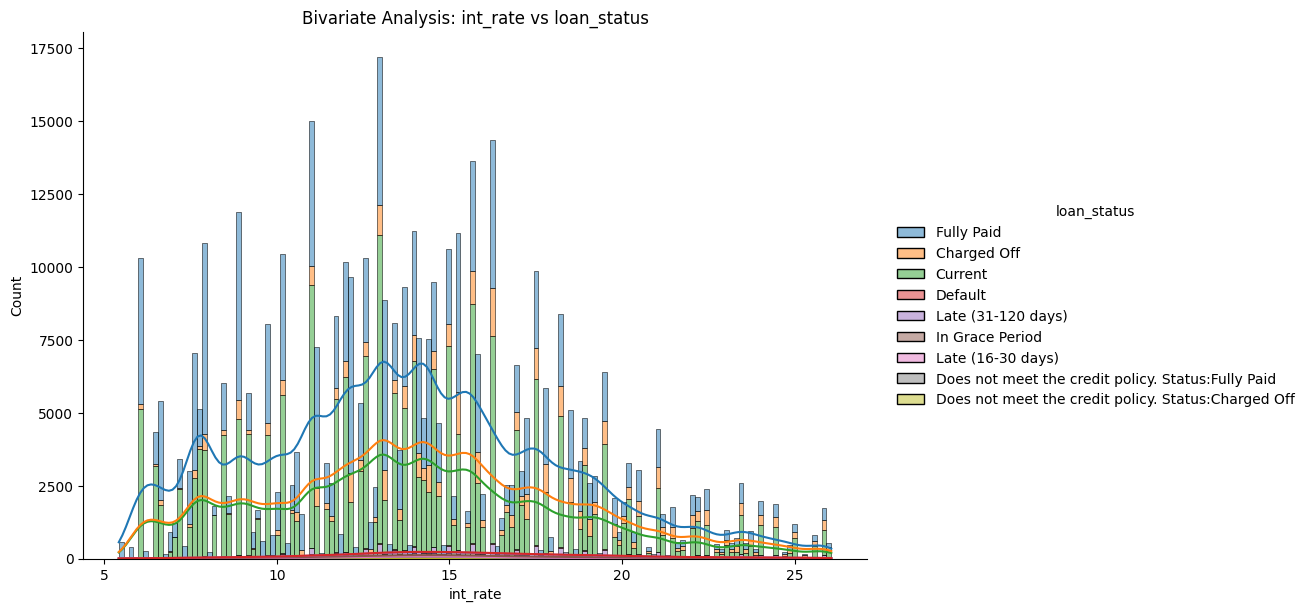

<Figure size 800x600 with 0 Axes>

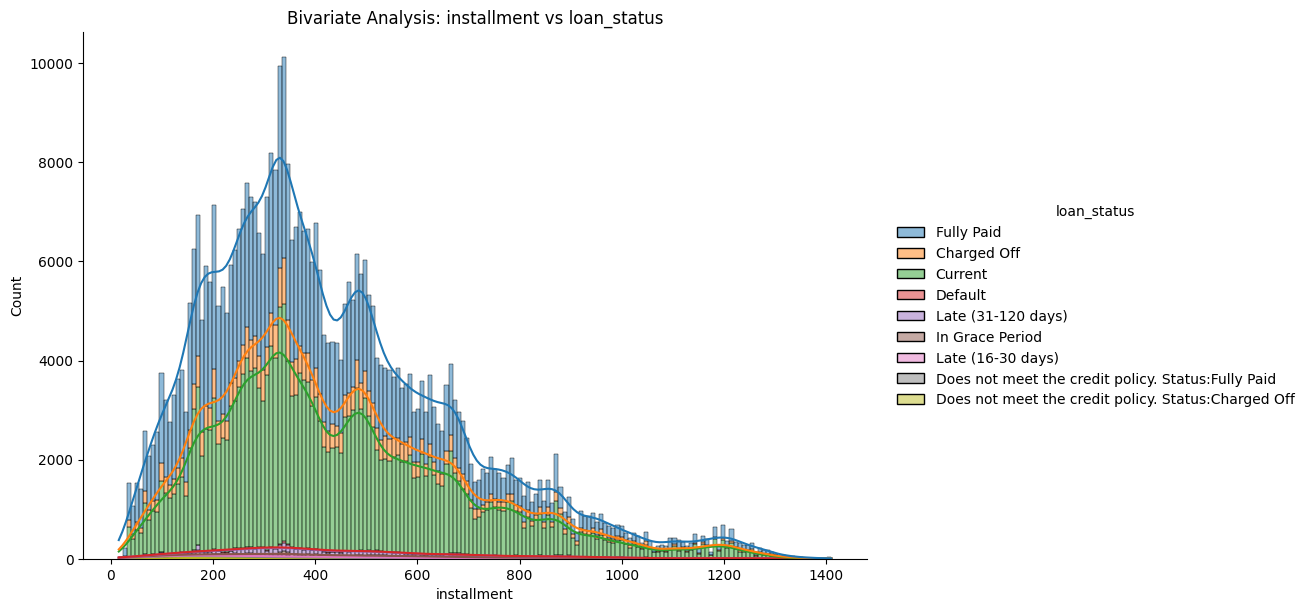

<Figure size 800x600 with 0 Axes>

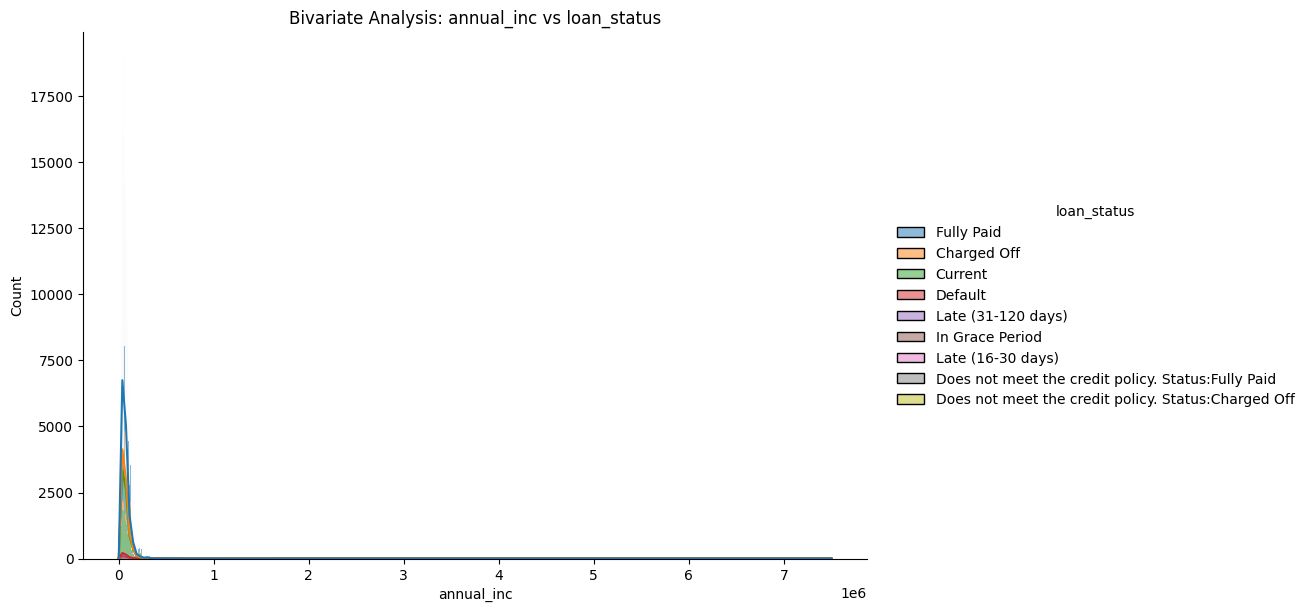

<Figure size 800x600 with 0 Axes>

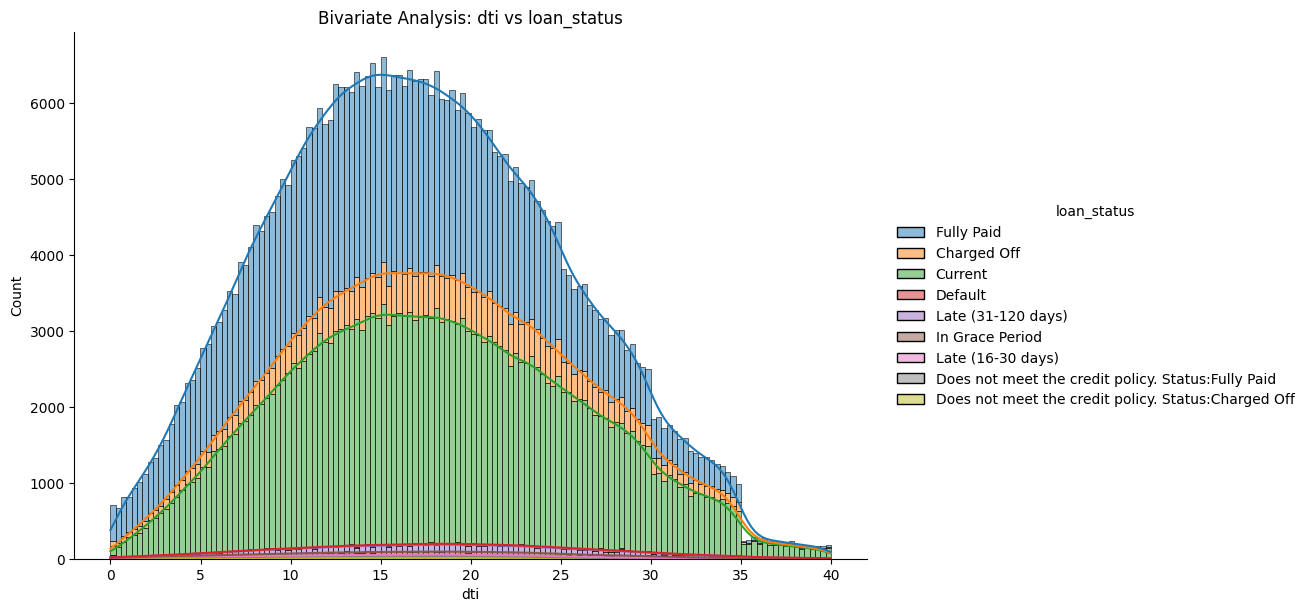

<Figure size 800x600 with 0 Axes>

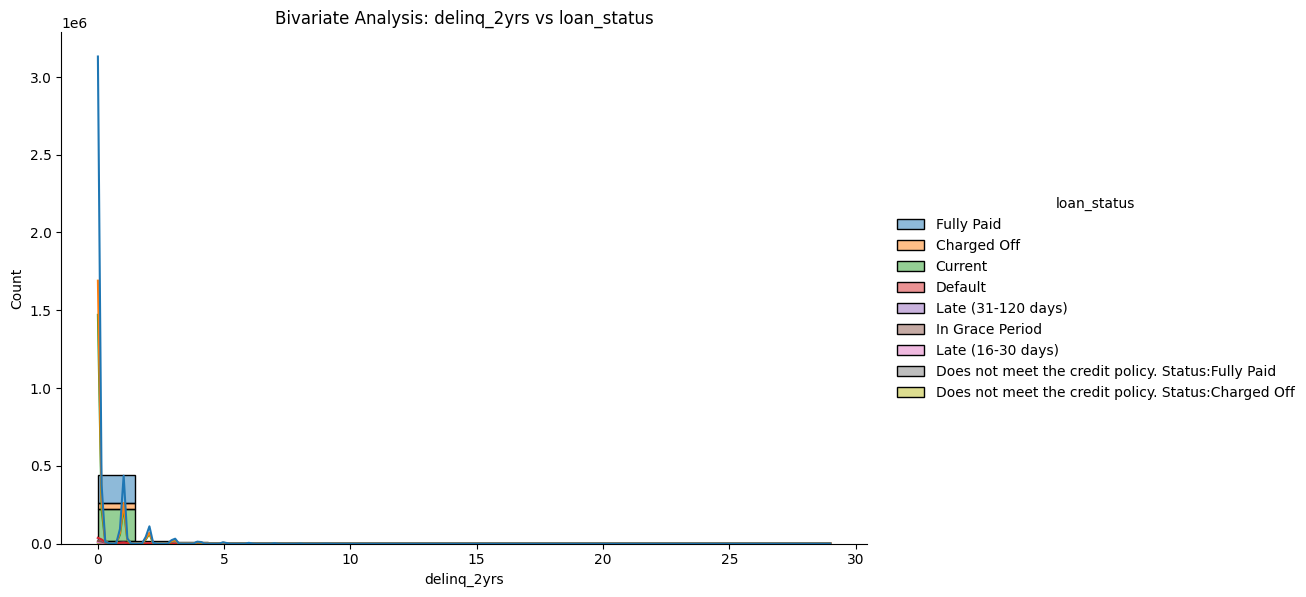

<Figure size 800x600 with 0 Axes>

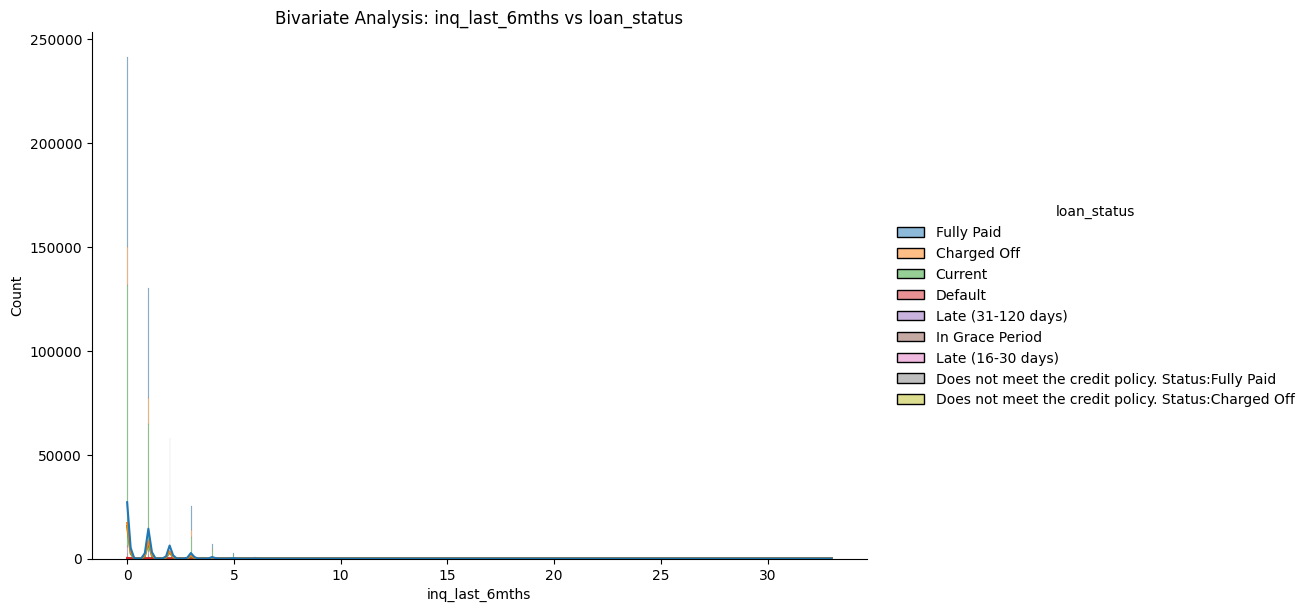

<Figure size 800x600 with 0 Axes>

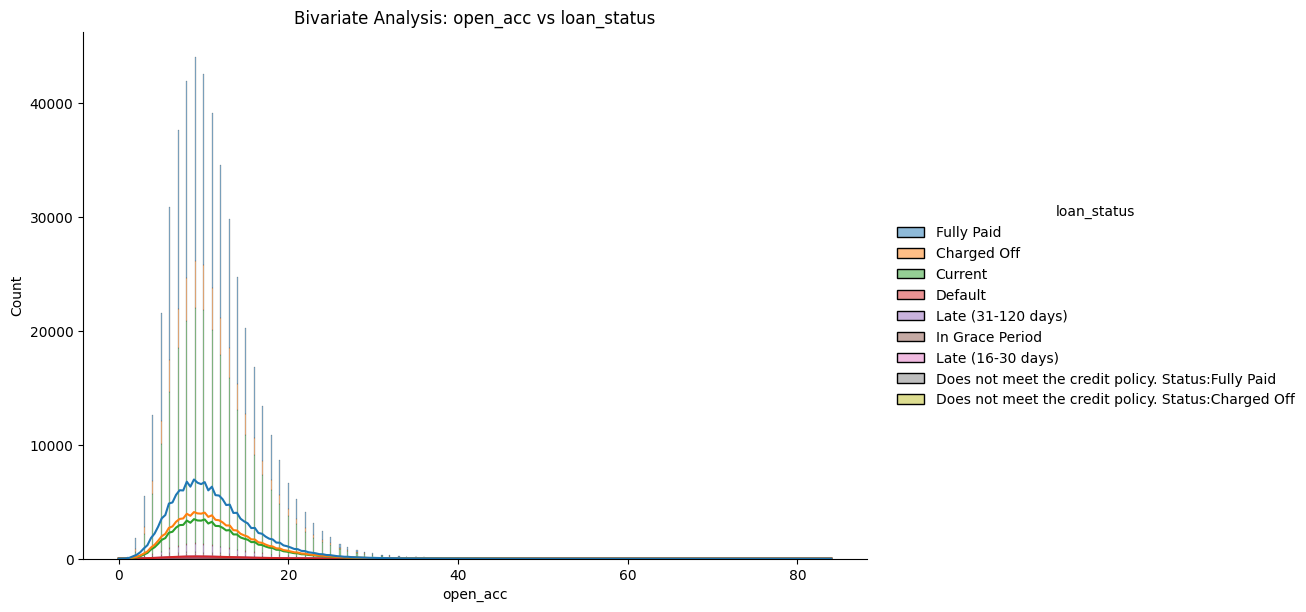

<Figure size 800x600 with 0 Axes>

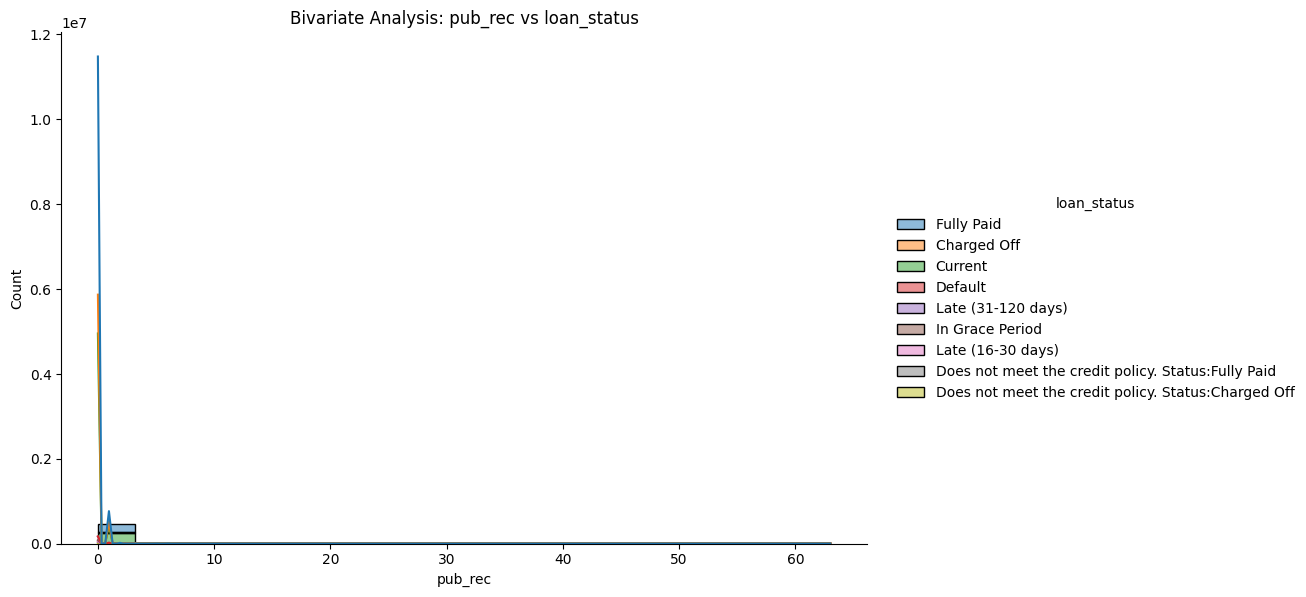

<Figure size 800x600 with 0 Axes>

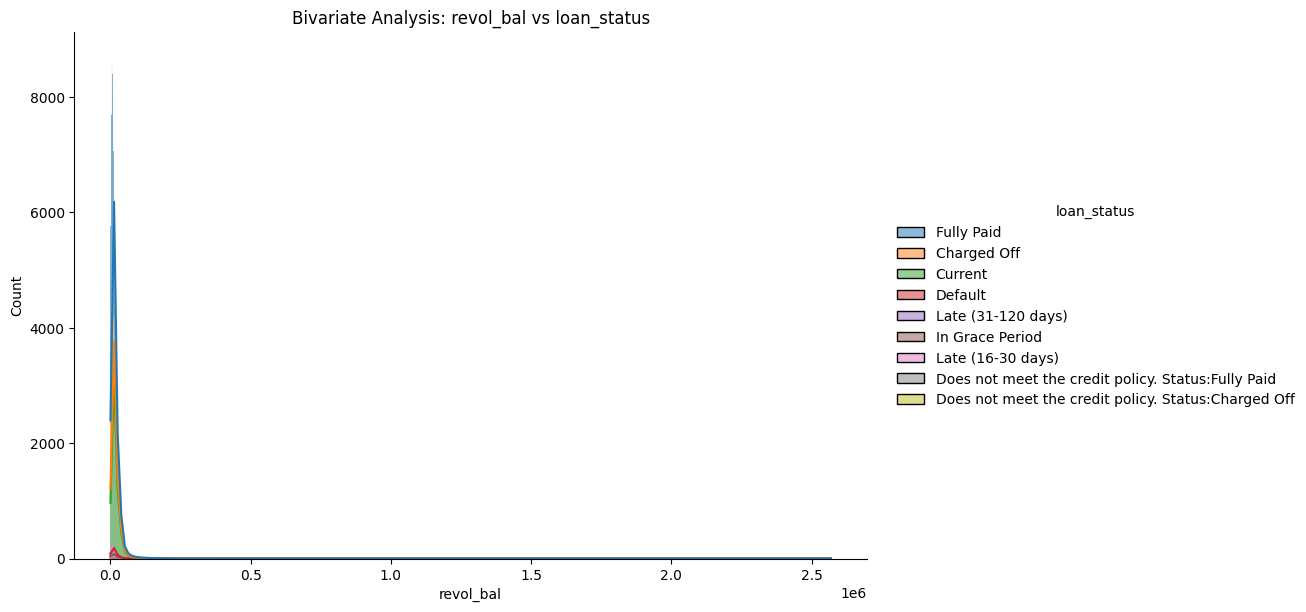

<Figure size 800x600 with 0 Axes>

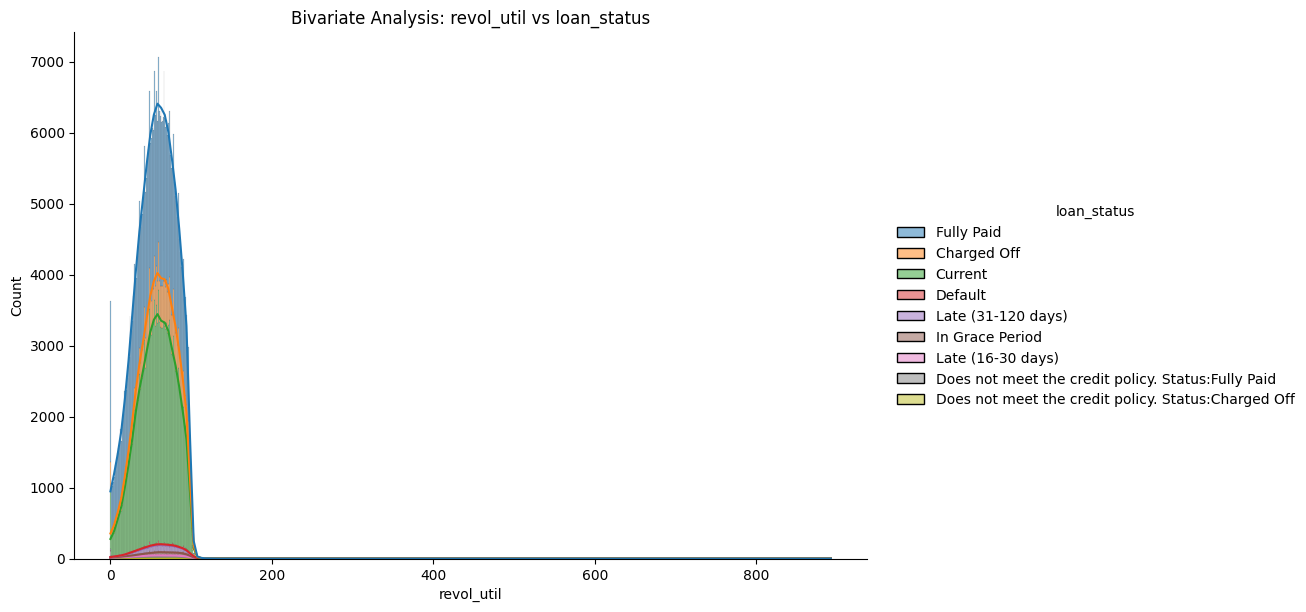

<Figure size 800x600 with 0 Axes>

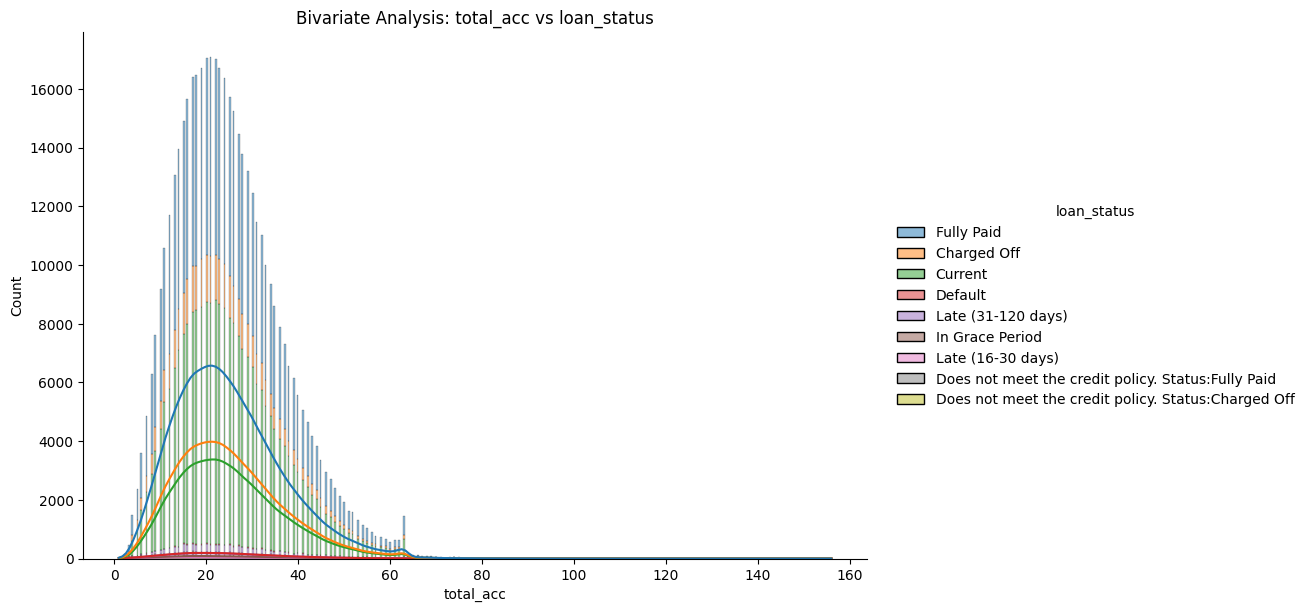

<Figure size 800x600 with 0 Axes>

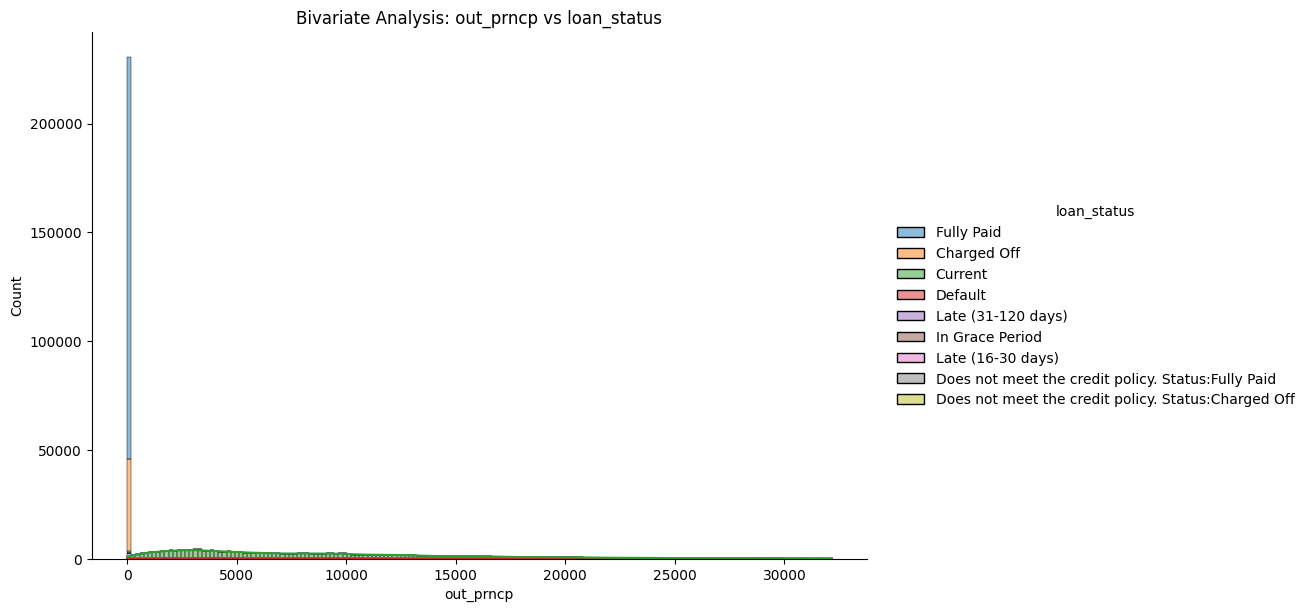

<Figure size 800x600 with 0 Axes>

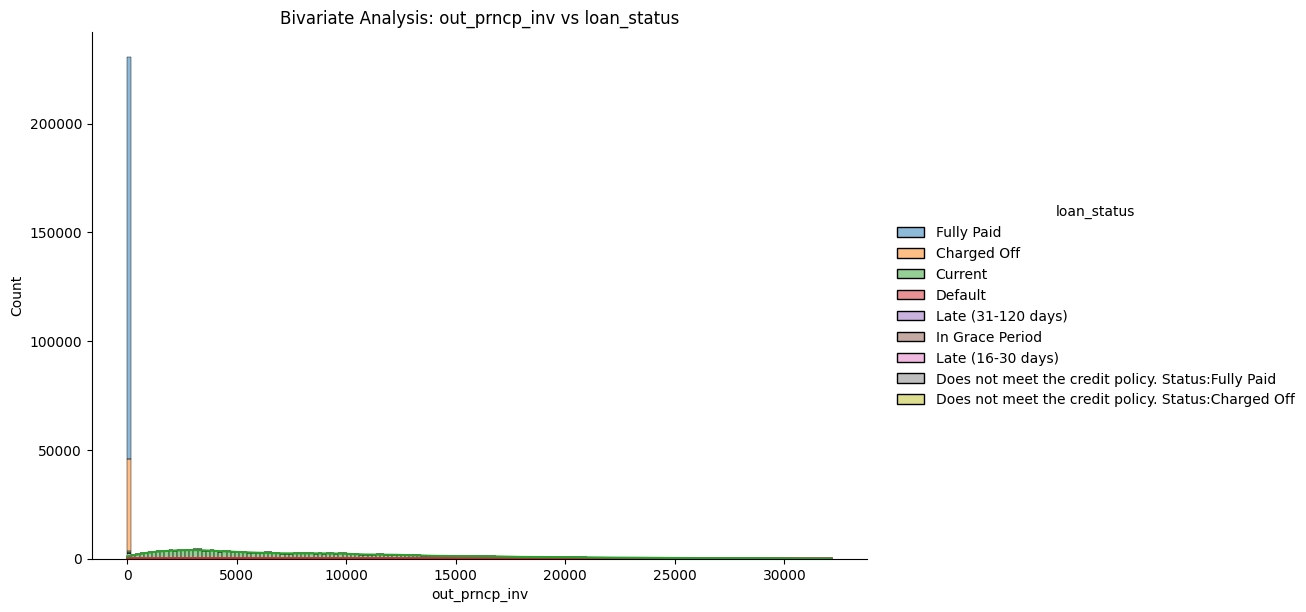

<Figure size 800x600 with 0 Axes>

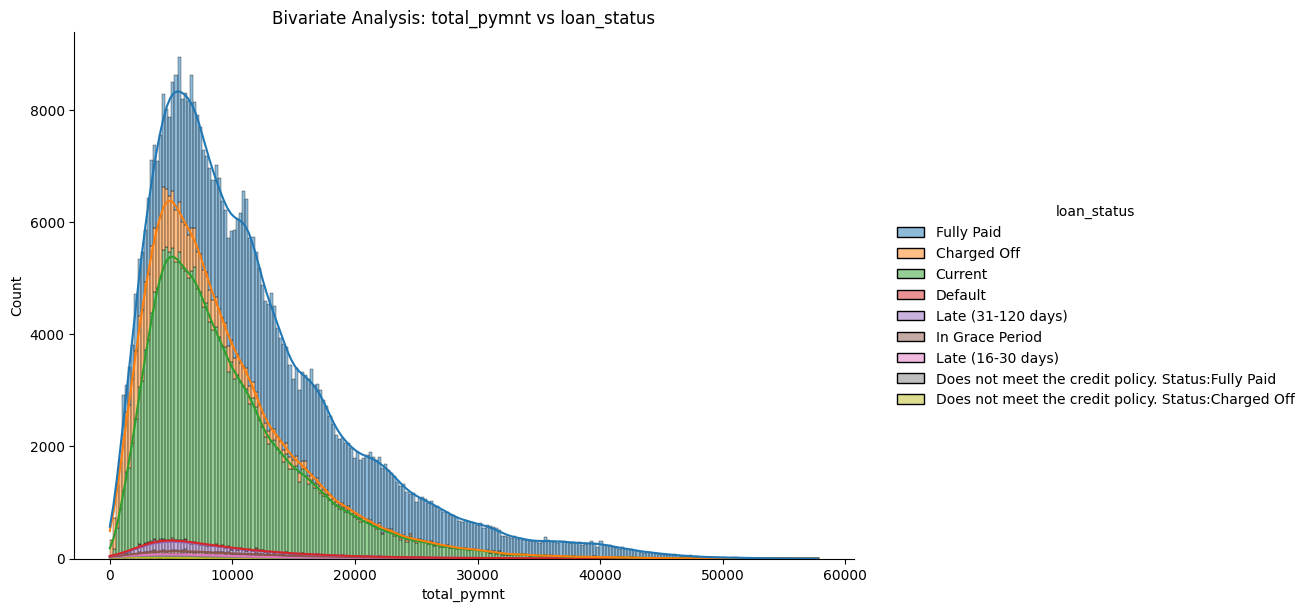

<Figure size 800x600 with 0 Axes>

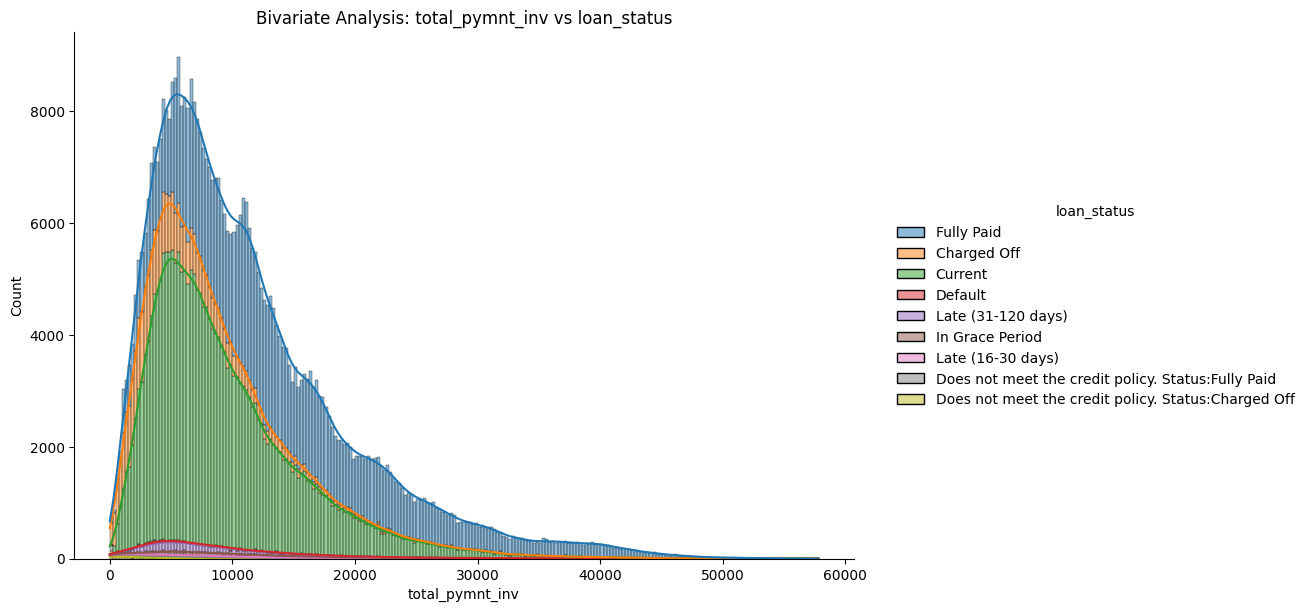

<Figure size 800x600 with 0 Axes>

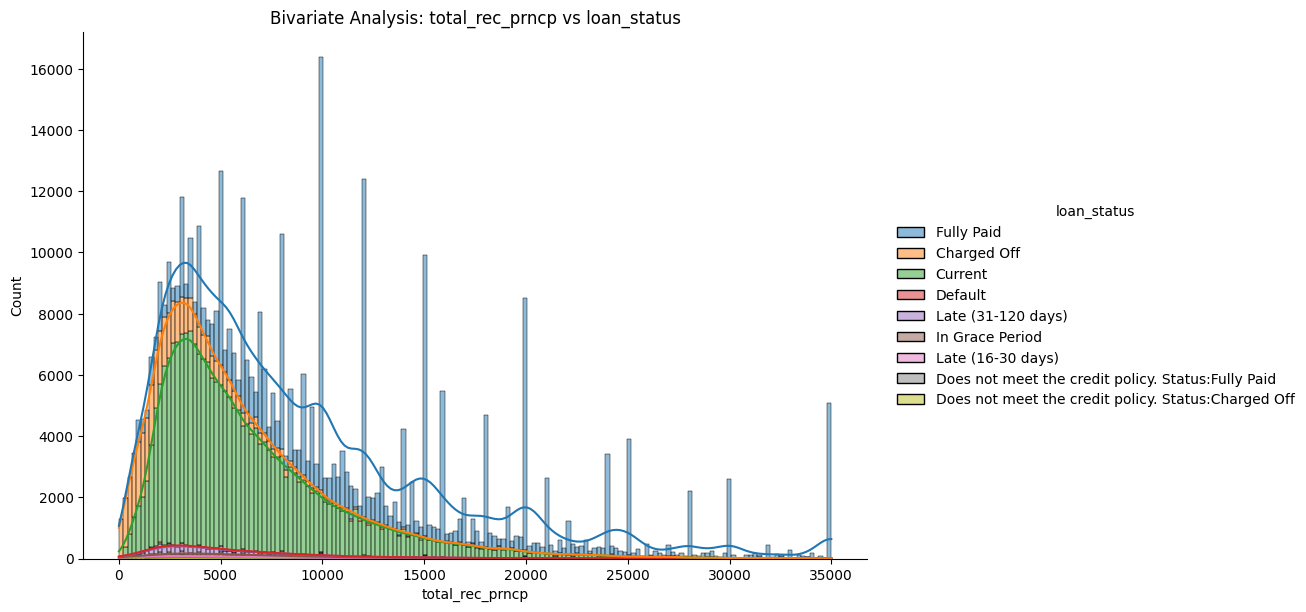

<Figure size 800x600 with 0 Axes>

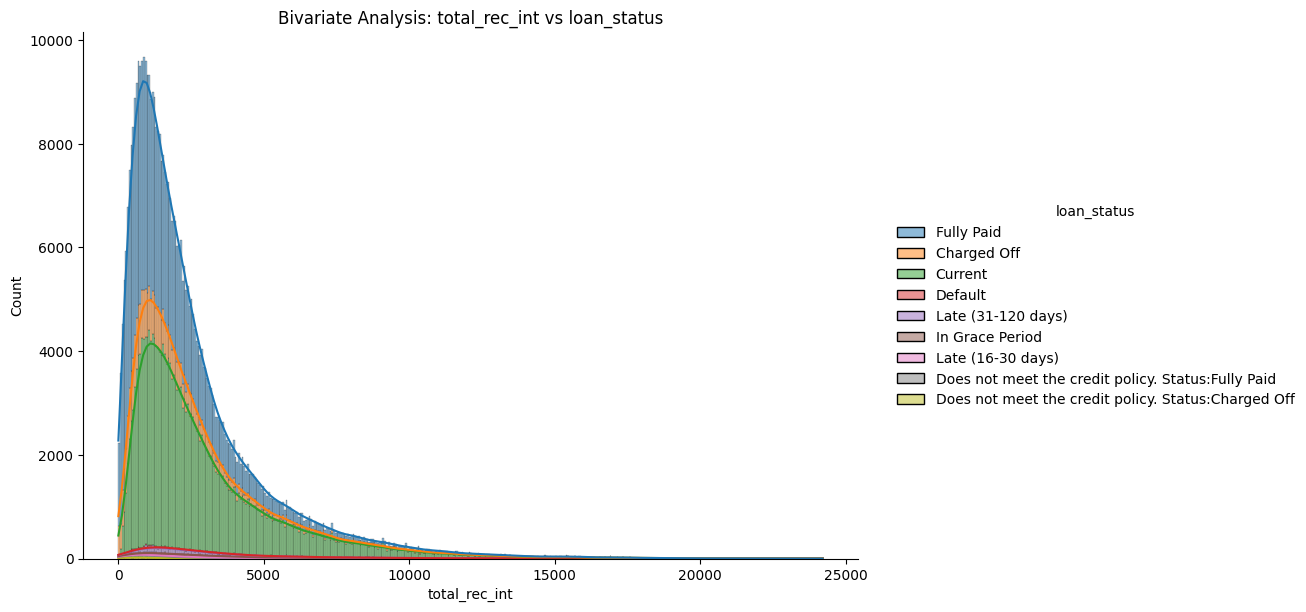

<Figure size 800x600 with 0 Axes>

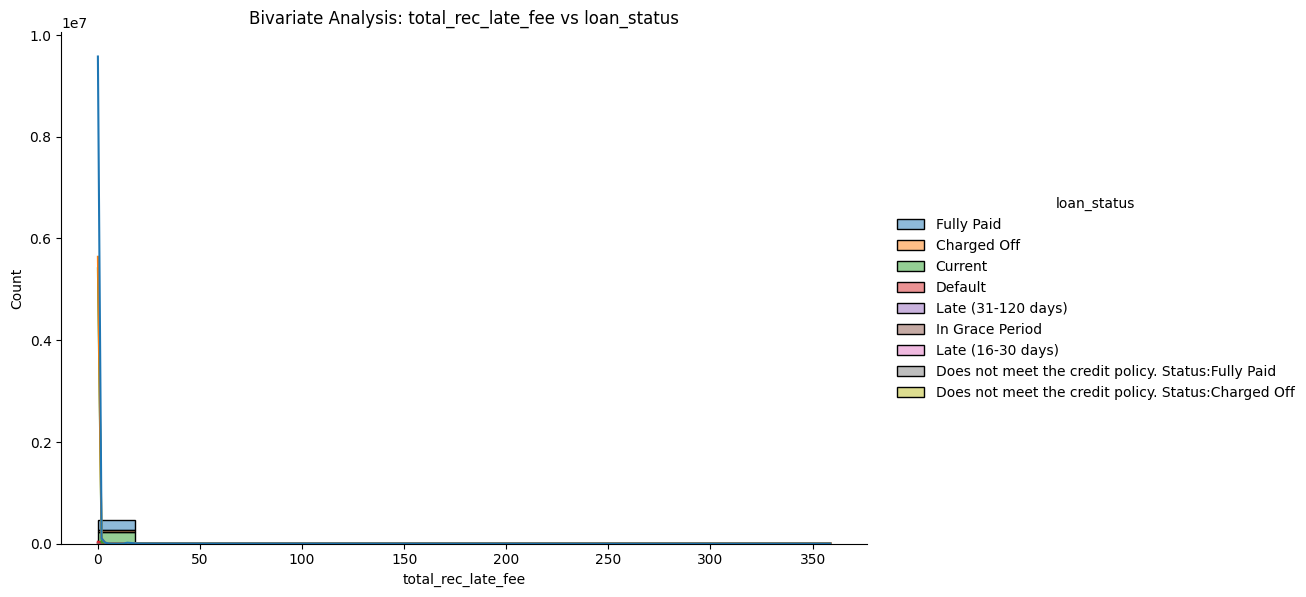

<Figure size 800x600 with 0 Axes>

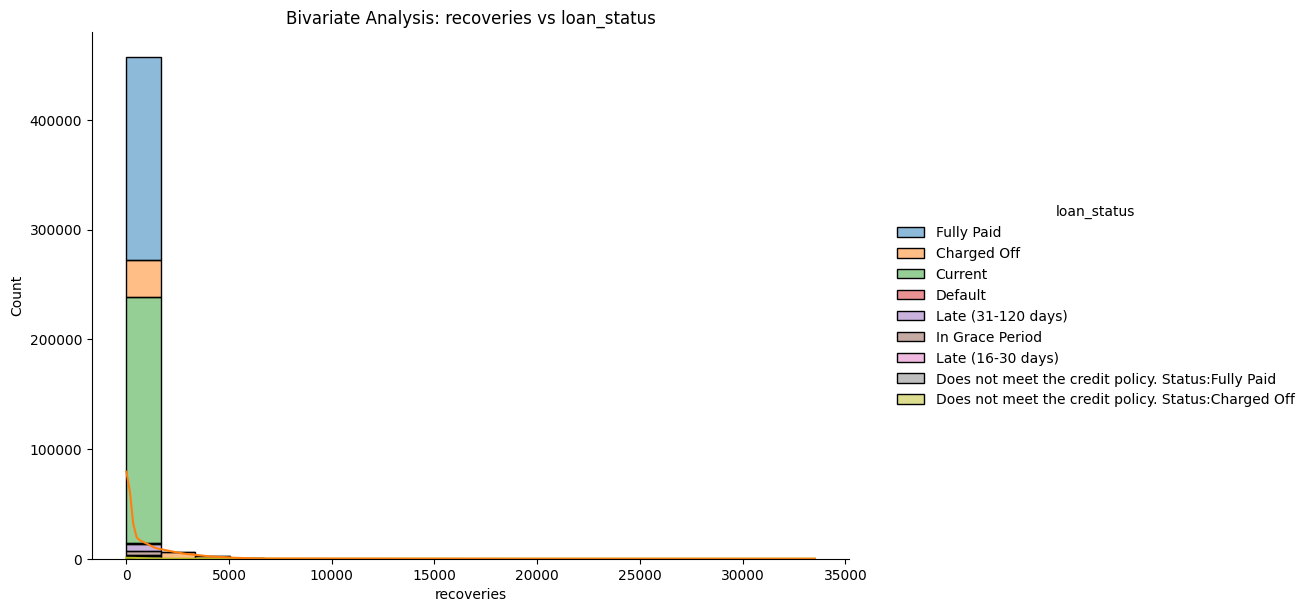

<Figure size 800x600 with 0 Axes>

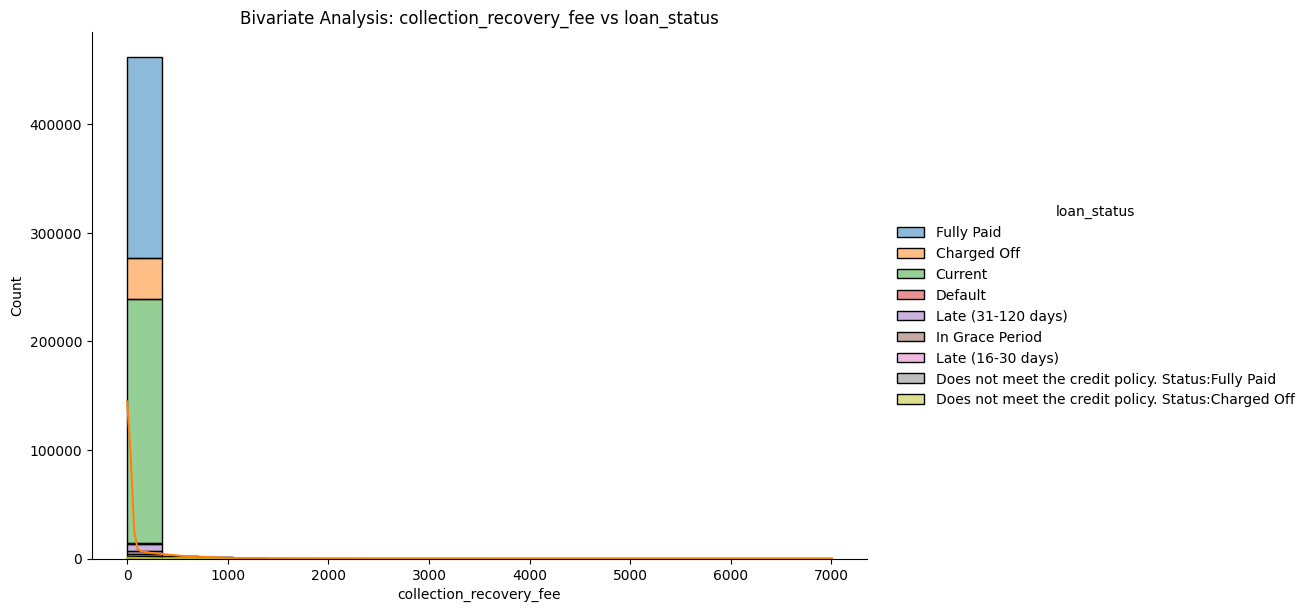

<Figure size 800x600 with 0 Axes>

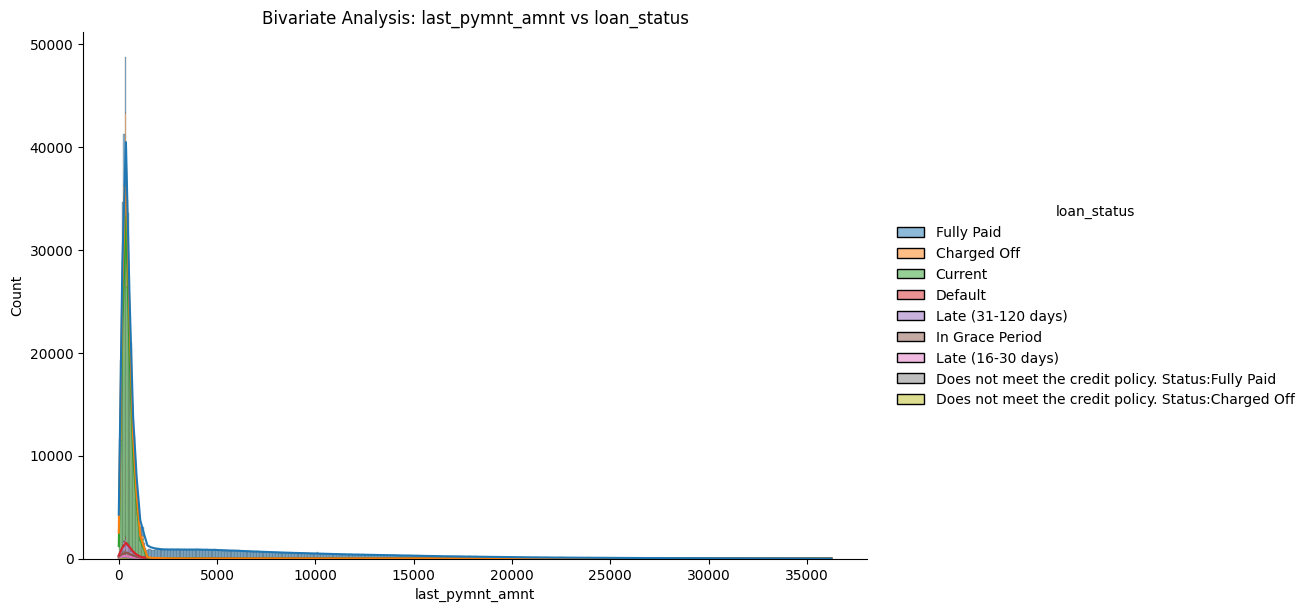

<Figure size 800x600 with 0 Axes>

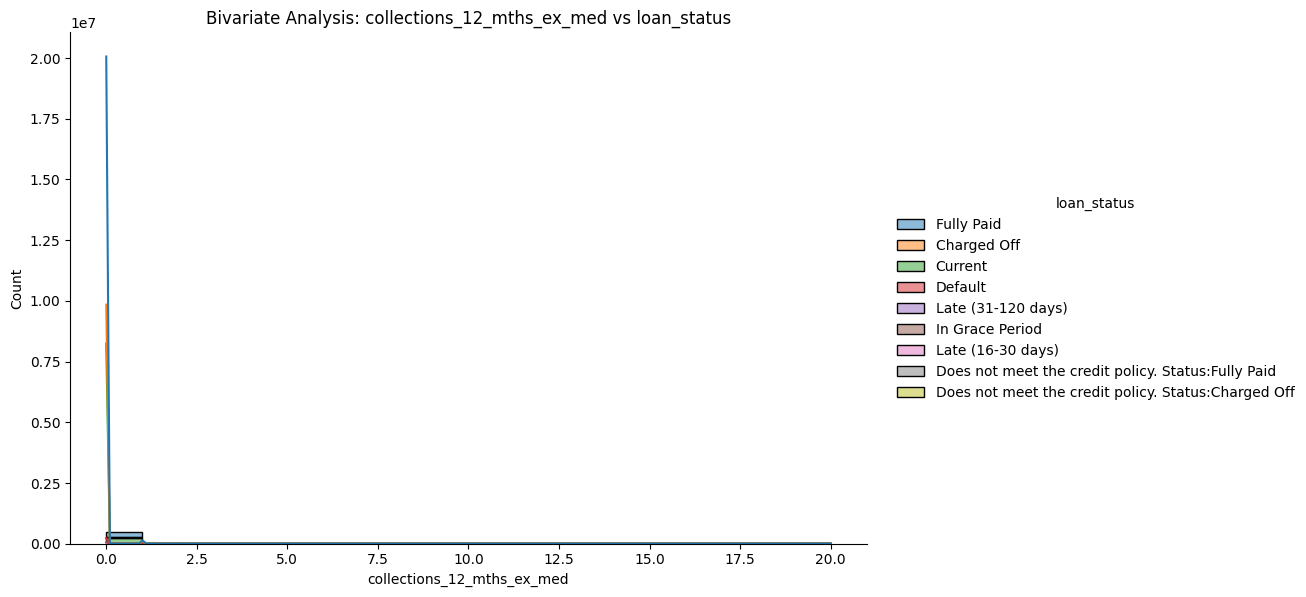

<Figure size 800x600 with 0 Axes>

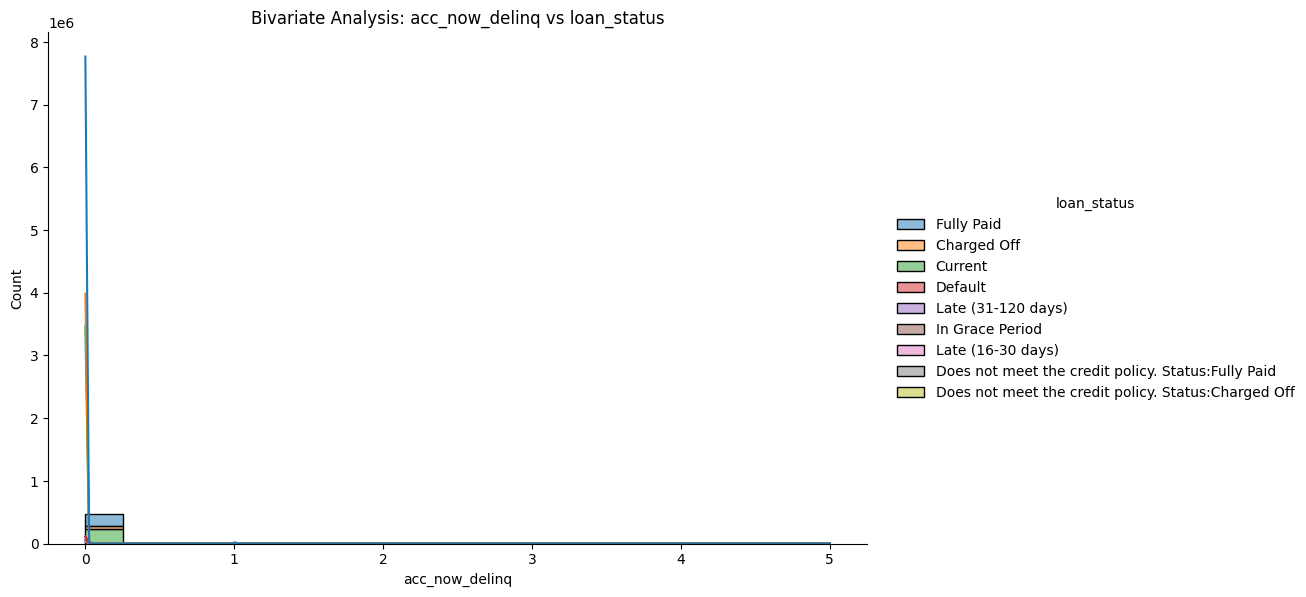

In [ ]:
# Bivariate analysis for numeric columns using distribution plot
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.displot(data=df_cleaned, x=col, hue='loan_status', kde=True, multiple="stack", height=6, aspect=1.5)
    plt.title(f'Bivariate Analysis: {col} vs loan_status')
    plt.show()

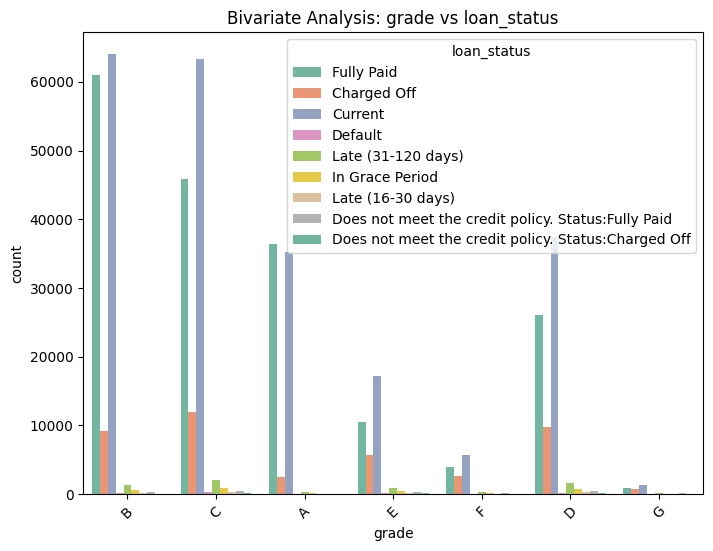

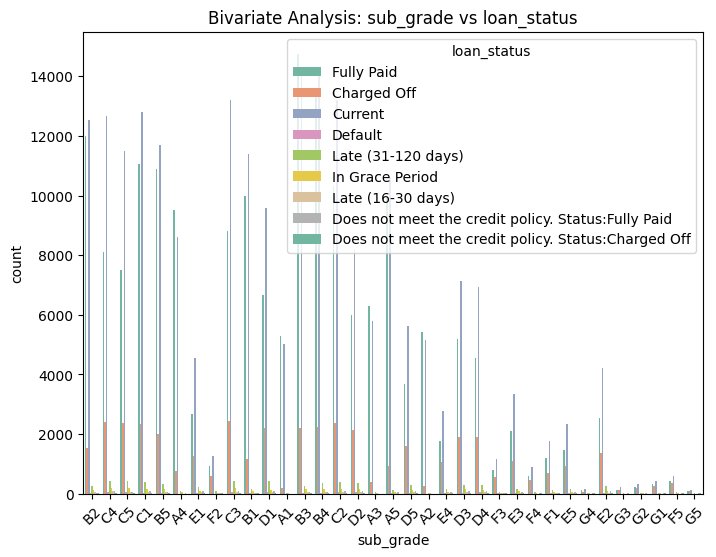

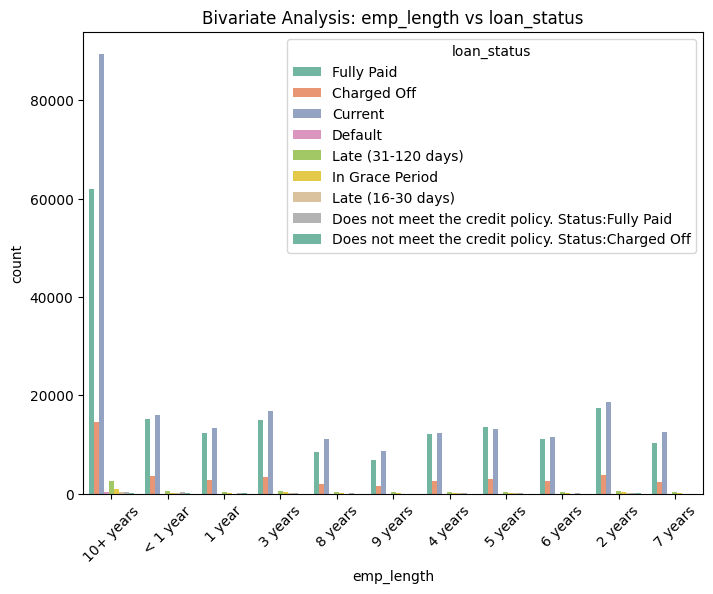

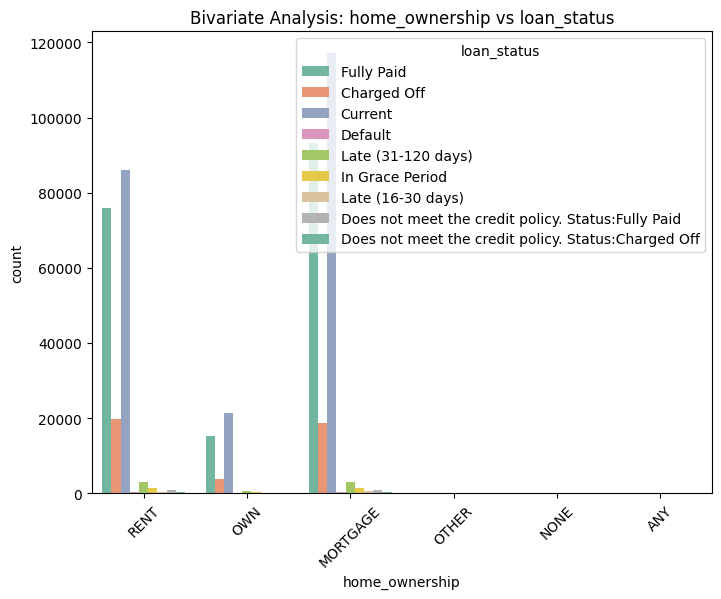

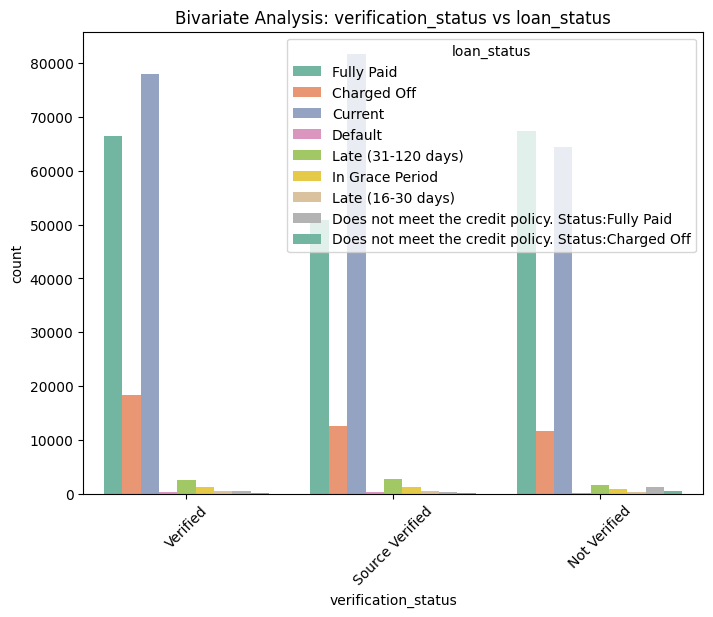

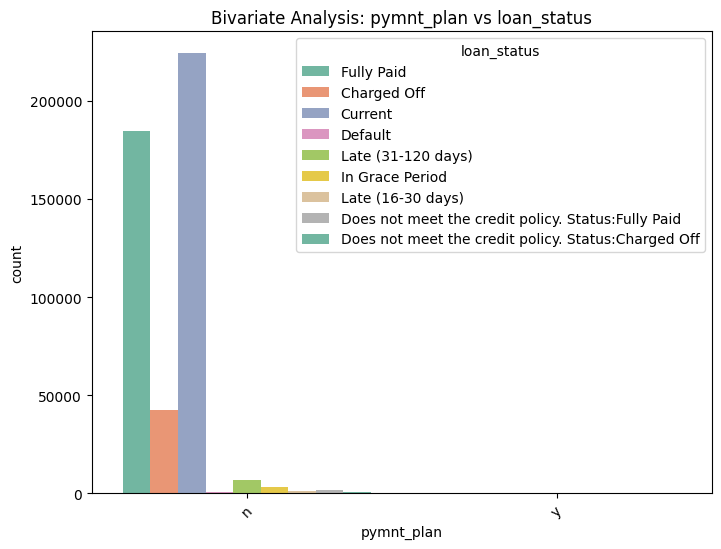

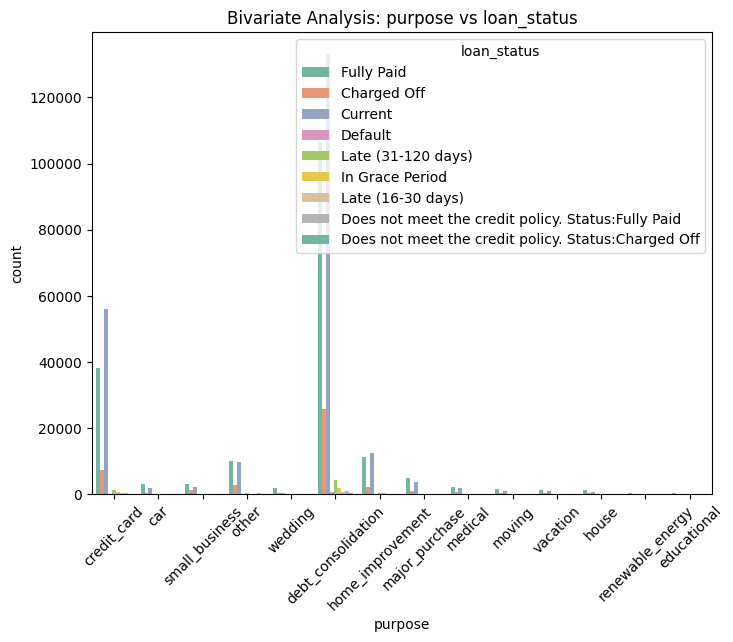

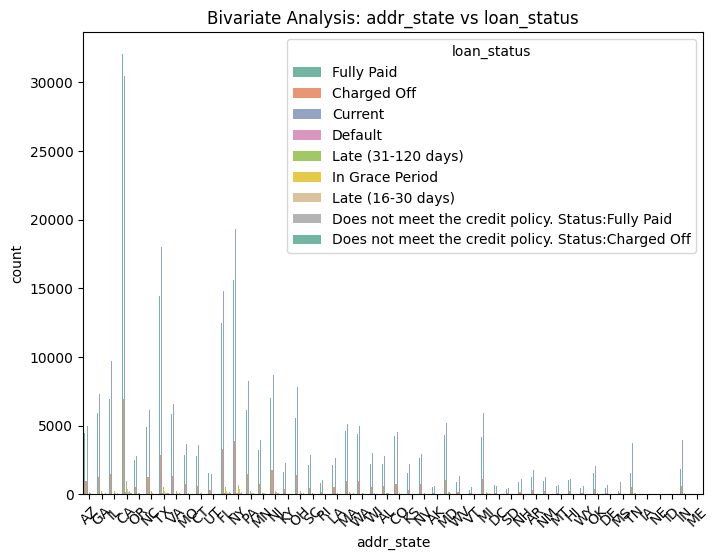

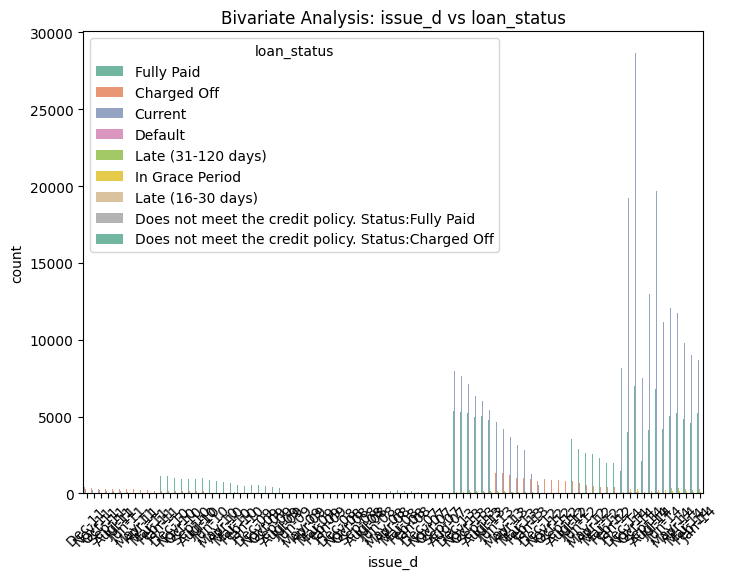

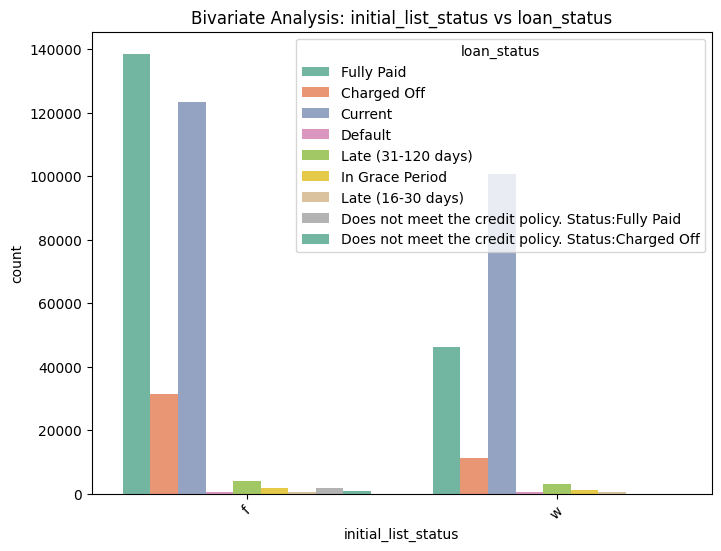

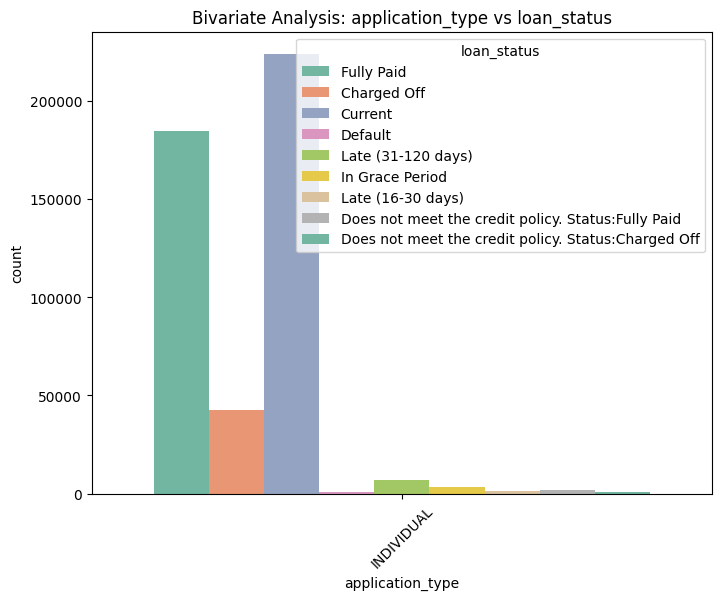

In [ ]:

# List of categorical columns in the dataset
categorical_columns = ['grade', 'sub_grade', 'emp_length', 'home_ownership',
                       'verification_status', 'pymnt_plan', 'purpose', 'addr_state',
                       'issue_d', 'initial_list_status', 'application_type']

# Bivariate analysis for categorical columns using countplot
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_cleaned, x=col, hue='loan_status', palette='Set2')
    plt.title(f'Bivariate Analysis: {col} vs loan_status')
    plt.xticks(rotation=45)
    plt.show()


#DATA PREPROCESSING

## Feature Encoding

In [21]:
import pandas as pd

# Encoding term (36 months = 1, 60 months = 2)
term_mapping = {' 36 months': 0, ' 60 months': 1}
df_cleaned['term_encoded'] = df_cleaned['term'].map(term_mapping)

# Encoding grade (A = 1, G = 7)
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
df_cleaned['grade_encoded'] = df_cleaned['grade'].map(grade_mapping)

# Encoding emp_length (1 year = 1, 10+ years = 10)
emp_length_mapping = {
    '< 1 year': 0,'1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5,
    '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10
}
df_cleaned['emp_length_encoded'] = df_cleaned['emp_length'].map(emp_length_mapping)

print(df_cleaned)


        Unnamed: 0  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0                0       5000         5000           4975.0   36 months   
1                1       2500         2500           2500.0   60 months   
2                2       2400         2400           2400.0   36 months   
3                3      10000        10000          10000.0   36 months   
4                4       3000         3000           3000.0   60 months   
...            ...        ...          ...              ...         ...   
466280      466280      18400        18400          18400.0   60 months   
466281      466281      22000        22000          22000.0   60 months   
466282      466282      20700        20700          20700.0   60 months   
466283      466283       2000         2000           2000.0   36 months   
466284      466284      10000        10000           9975.0   36 months   

        int_rate  installment grade sub_grade  \
0          10.65       162.87     B        B2   
1

## Feature Engineering

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime

# 1. Debt-to-Income Ratio (DTI) - recalculated using annual_inc and loan_amnt
# Assuming dti is the percentage of annual income allocated towards debt repayment,
# we will recalculate it as loan_amnt / annual_inc to give a more direct comparison.
df_cleaned['dti_recalculated'] = df_cleaned['loan_amnt'] / df_cleaned['annual_inc']

# 2. Credit Age (in years) - Calculate number of years since earliest_cr_line
# Convert 'earliest_cr_line' to datetime
df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], errors='coerce')
# Calculate the difference in years
df_cleaned['credit_age'] = df_cleaned['earliest_cr_line'].apply(lambda x: (datetime.now() - x).days / 365 if pd.notnull(x) else np.nan)

# 3. Loan-to-Income Ratio (Interaction Feature)
# Calculate loan-to-income ratio: loan_amnt / annual_inc
df_cleaned['loan_to_income'] = df_cleaned['loan_amnt'] / df_cleaned['annual_inc']

# Display the first few rows of the updated dataframe to check the new features
df_cleaned[['loan_amnt', 'annual_inc', 'dti_recalculated', 'credit_age', 'loan_to_income']].head()


<ipython-input-22-fbf17c35f8e9>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], errors='coerce')


loan_amnt  annual_inc  dti_recalculated  credit_age  loan_to_income
0       5000     24000.0          0.208333   39.942466        0.208333
1       2500     30000.0          0.083333   25.687671        0.083333
2       2400     12252.0          0.195886         NaN        0.195886
3      10000     49200.0          0.203252   28.852055        0.203252
4       3000     80000.0          0.037500   28.936986        0.037500

# Feature Selection

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# Assuming df_cleaned is your cleaned dataset

# Get object columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Create an empty dictionary to store Chi-Square test results
chi_square_results = {}

# Loop through all object columns for feature selection
for column in categorical_columns:
    if column != 'loan_status':  # Exclude target variable (already encoded)
        # Apply LabelEncoder to each categorical feature
        df_cleaned[column + '_encoded'] = le.fit_transform(df_cleaned[column])

        # Perform the Chi-Square test
        contingency_table = pd.crosstab(df_cleaned[column + '_encoded'], df_cleaned['loan_status_encoded'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Store the p-value
        chi_square_results[column] = p

# Convert the results to a DataFrame for easy viewing
chi_square_df = pd.DataFrame.from_dict(chi_square_results, orient='index', columns=['p_value'])
chi_square_df.sort_values(by='p_value', ascending=True, inplace=True)

# Display the Chi-Square test results
print(chi_square_df)


                          p_value
term                 0.000000e+00
grade                0.000000e+00
sub_grade            0.000000e+00
emp_title            0.000000e+00
emp_length           0.000000e+00
home_ownership       0.000000e+00
verification_status  0.000000e+00
issue_d              0.000000e+00
purpose              0.000000e+00
title                0.000000e+00
addr_state           0.000000e+00
initial_list_status  0.000000e+00
last_pymnt_d         0.000000e+00
last_credit_pull_d   0.000000e+00
pymnt_plan           1.283501e-29
application_type     1.000000e+00


#DATA MODELLING

In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466140 entries, 0 to 466284
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Unnamed: 0                  466140 non-null  int64         
 1   loan_amnt                   466140 non-null  int64         
 2   funded_amnt                 466140 non-null  int64         
 3   funded_amnt_inv             466140 non-null  float64       
 4   term                        466140 non-null  object        
 5   int_rate                    466140 non-null  float64       
 6   installment                 466140 non-null  float64       
 7   grade                       466140 non-null  object        
 8   sub_grade                   466140 non-null  object        
 9   emp_title                   466140 non-null  object        
 10  emp_length                  466140 non-null  object        
 11  home_ownership              466140 non-null 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score


# Features (X)
features = ['annual_inc', 'emp_length_encoded', 'loan_amnt', 'term_encoded',
            'grade_encoded', 'total_rec_prncp', 'total_rec_int',
            'last_pymnt_amnt', 'delinq_2yrs', 'revol_util', 'loan_to_income', 'dti_recalculated']
X = df_cleaned[features]

# Target (y) - replace 'target' with the actual column name you're predicting
y = df_cleaned['loan_status_encoded']  # Modify to your target column, e.g., if predicting loan default, this could be 'loan_default'

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Data Standardization (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Machine Learning Model

In [ ]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

def evaluate_model(classifiers, X_train, y_train, X_test, y_test):
    results = []
    for name, clf in classifiers.items():
        print(f"Training {name}...")
        clf.fit(X_train, y_train)

        # Evaluate on training data
        y_train_pred = clf.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, average='weighted')  # Use 'weighted' for multiclass
        train_recall = recall_score(y_train, y_train_pred, average='weighted')
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')

        # ROC-AUC for training
        y_train_proba = clf.predict_proba(X_train)
        train_roc_auc = roc_auc_score(y_train, y_train_proba, multi_class='ovr', average='weighted')

        # Evaluate on test data
        y_test_pred = clf.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, average='weighted')
        test_recall = recall_score(y_test, y_test_pred, average='weighted')
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')

        # ROC-AUC for testing
        y_test_proba = clf.predict_proba(X_test)
        test_roc_auc = roc_auc_score(y_test, y_test_proba, multi_class='ovr', average='weighted')

        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_test_pred)

        results.append({
            'Model': name,
            'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy,
            'Train Precision': train_precision, 'Test Precision': test_precision,
            'Train Recall': train_recall, 'Test Recall': test_recall,
            'Train F1-Score': train_f1, 'Test F1-Score': test_f1,
            'Train ROC-AUC': train_roc_auc, 'Test ROC-AUC': test_roc_auc,
            'Confusion Matrix': conf_matrix
        })

    results_df = pd.DataFrame(results)

    # Display the results as a table
    print("\nResults Summary:")
    pd.set_option('display.max_columns', None)  # Ensure all columns are shown
    display(results_df)  # Display the table in Jupyter Notebook or IPython

    # Print results
    for _, row in results_df.iterrows():
        print(f"Model: {row['Model']}")
        print(f"Train Accuracy: {row['Train Accuracy']:.4f}")
        print(f"Test Accuracy: {row['Test Accuracy']:.4f}")
        print(f"Train Precision: {row['Train Precision']:.4f}")
        print(f"Test Precision: {row['Test Precision']:.4f}")
        print(f"Train Recall: {row['Train Recall']:.4f}")
        print(f"Test Recall: {row['Test Recall']:.4f}")
        print(f"Train F1-Score: {row['Train F1-Score']:.4f}")
        print(f"Test F1-Score: {row['Test F1-Score']:.4f}")
        print(f"Train ROC-AUC: {row['Train ROC-AUC']:.4f}")
        print(f"Test ROC-AUC: {row['Test ROC-AUC']:.4f}")
        print("Confusion Matrix:")
        print(row['Confusion Matrix'])
        print()

    return results_df


In [ ]:
# Evaluate without SMOTE
results_without_smote = evaluate_model(classifiers, X_train_scaled, y_train, X_test_scaled, y_test)

Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Gradient Boosting...
Training Decision Tree...
Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Results Summary:


Model  Train Accuracy  Test Accuracy  Train Precision  \
0        Random Forest        0.999971       0.926567         0.999971   
1    Gradient Boosting        0.915841       0.914307         0.914236   
2        Decision Tree        1.000000       0.881441         1.000000   
3  Logistic Regression        0.885898       0.887480         0.862614   

   Test Precision  Train Recall  Test Recall  Train F1-Score  Test F1-Score  \
0        0.903617      0.999971     0.926567        0.999970       0.908951   
1        0.893005      0.915841     0.914307        0.897823       0.895531   
2        0.886391      1.000000     0.881441        1.000000       0.883891   
3        0.866012      0.885898     0.887480        0.855783       0.857609   

   Train ROC-AUC  Test ROC-AUC  \
0       1.000000      0.970214   
1       0.966372      0.964377   
2       1.000000      0.916438   
3       0.951464      0.952608   

                                    Confusion Matrix  
0  [[36993, 10, 102, 0, 0, 0, 0, 1, 0], [104, 515...  
1  [[36913, 19, 139, 4, 4, 8, 1, 17, 1], [83, 437...  
2  [[36494, 51, 118, 2, 2, 3, 13, 422, 1], [60, 5...  
3  [[36922, 26, 157, 0, 1, 0, 0, 0, 0], [72, 2248...

Model: Random Forest
Train Accuracy: 1.0000
Test Accuracy: 0.9266
Train Precision: 1.0000
Test Precision: 0.9036
Train Recall: 1.0000
Test Recall: 0.9266
Train F1-Score: 1.0000
Test F1-Score: 0.9090
Train ROC-AUC: 1.0000
Test ROC-AUC: 0.9702
Confusion Matrix:
[[36993    10   102     0     0     0     0     1     0]
 [  104  5152  3173     0     0     0     9     0     0]
 [  342   204 44231     0     3     0     4     0     0]
 [    1    48   103     0     0     0     0     0     0]
 [    9    21   577     0     0     0     0     0     0]
 [    5    17   227     0     0     0     0     0     0]
 [   19   285  1079     0     0     0     4     0     0]
 [  358     0    12     0     0     0     0     2     0]
 [    4    77    51     0     0     0     0     1     0]]

Model: Gradient Boosting
Train Accuracy: 0.9158
Test Accuracy: 0.9143
Train Precision: 0.9142
Test Precision: 0.8930
Train Recall: 0.9158
Test Recall: 0.9143
Train F1-Score: 0.8978
Test F1-Score: 0.8955
Train ROC-AUC: 0.9664


## Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearch or RandomizedSearch
param_grid = {
    'n_estimators': [10, 20],  # Number of trees
    'max_depth': [None, 10],   # Depth of trees
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,         # Number of parameter settings sampled
    scoring='accuracy', # Metric to optimize
    cv=5,               # Cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model to the data
random_search.fit(X_train_scaled, y_train)

# Display the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Use the best model
best_rf = random_search.best_estimator_


# Evaluate on the test set
y_test_pred = best_rf.predict(X_test_scaled)  # Hard predictions
y_test_proba = best_rf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Compute accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)



Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'n_estimators': 20, 'max_depth': 10}
Best Score: 0.8735040672168826
Test Accuracy: 0.8850345389797056
